In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import dask.dataframe as dd

file_path = "/content/drive/MyDrive/train_2.csv"

df = dd.read_csv(file_path)
df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_columns)


Numeric columns: Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [ ]:
df = df.repartition(npartitions=10)
df.isnull().sum().compute()


,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,376
dropoff_latitude,376
passenger_count,0


In [ ]:
from sklearn.impute import KNNImputer

chunk_size = 500000
first_chunk = True
file_path = "/content/drive/MyDrive/train_2.csv"
output_file = "/content/drive/MyDrive/trainwithoutnull_2.csv"

for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):

    numeric_cols = ['dropoff_longitude', 'dropoff_latitude']


    complete_rows = chunk.dropna(subset=numeric_cols)
    missing_rows = chunk[chunk[numeric_cols].isnull().any(axis=1)]


    if not complete_rows.empty and not missing_rows.empty:
        knn_imputer = KNNImputer(n_neighbors=5)
        knn_imputer.fit(complete_rows[numeric_cols])


        chunk.loc[missing_rows.index, numeric_cols] = knn_imputer.transform(missing_rows[numeric_cols])


    chunk.to_csv(output_file, mode="w" if first_chunk else "a", header=first_chunk, index=False)


    first_chunk = False

    print(f" Processed {len(chunk):,} rows... (Chunk {i+1})")

print(f" Full dataset with KNN Imputation saved at: {output_file}")


 Processed 500,000 rows... (Chunk 1)
 Processed 500,000 rows... (Chunk 2)
 Processed 500,000 rows... (Chunk 3)
 Processed 500,000 rows... (Chunk 4)
 Processed 500,000 rows... (Chunk 5)
 Processed 500,000 rows... (Chunk 6)
 Processed 500,000 rows... (Chunk 7)
 Processed 500,000 rows... (Chunk 8)
 Processed 500,000 rows... (Chunk 9)
 Processed 500,000 rows... (Chunk 10)
 Processed 500,000 rows... (Chunk 11)
 Processed 500,000 rows... (Chunk 12)
 Processed 500,000 rows... (Chunk 13)
 Processed 500,000 rows... (Chunk 14)
 Processed 500,000 rows... (Chunk 15)
 Processed 500,000 rows... (Chunk 16)
 Processed 500,000 rows... (Chunk 17)
 Processed 500,000 rows... (Chunk 18)
 Processed 500,000 rows... (Chunk 19)
 Processed 500,000 rows... (Chunk 20)
 Processed 500,000 rows... (Chunk 21)
 Processed 500,000 rows... (Chunk 22)
 Processed 500,000 rows... (Chunk 23)
 Processed 500,000 rows... (Chunk 24)
 Processed 500,000 rows... (Chunk 25)
 Processed 500,000 rows... (Chunk 26)
 Processed 500,000 ro


Processing column: fare_amount
         Statistic   Original      Noisy
0             Mean  11.358361  11.358340
1          Std Dev   9.916617  10.118537
2         Skewness   4.898261   4.612824
3         Kurtosis  83.164638  76.658683
4  25th Percentile   6.000000   5.874986
5    Median (50th)   8.500000   8.695563
6  75th Percentile  12.500000  13.052071

KS Test for fare_amount: D-statistic = 0.0735, p-value = 0.0000
Significant difference in distribution for fare_amount (p < 0.05).


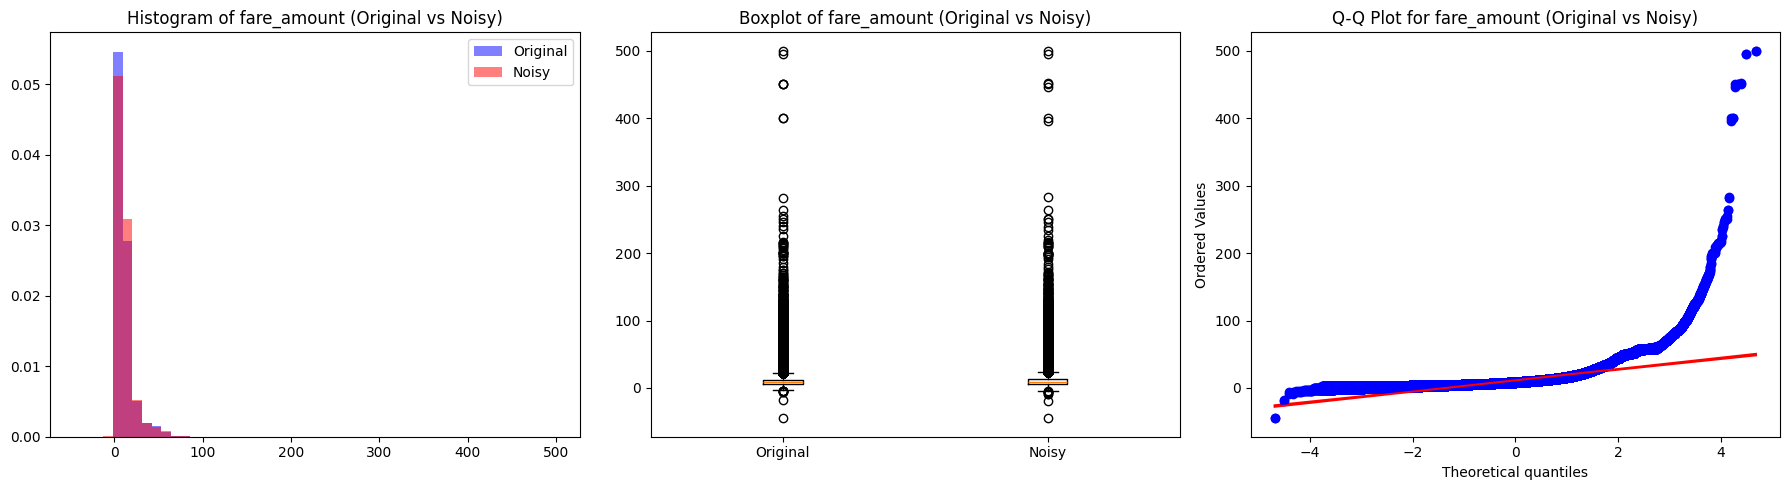


Processing column: pickup_longitude
         Statistic     Original        Noisy
0             Mean   -72.519958   -72.522262
1          Std Dev    11.856831    12.024006
2         Skewness   -14.005746   -13.403020
3         Kurtosis  9867.475370  9320.130223
4  25th Percentile   -73.992047   -75.294306
5    Median (50th)   -73.981785   -73.928652
6  75th Percentile   -73.967117   -72.534980

KS Test for pickup_longitude: D-statistic = 0.4805, p-value = 0.0000
Significant difference in distribution for pickup_longitude (p < 0.05).


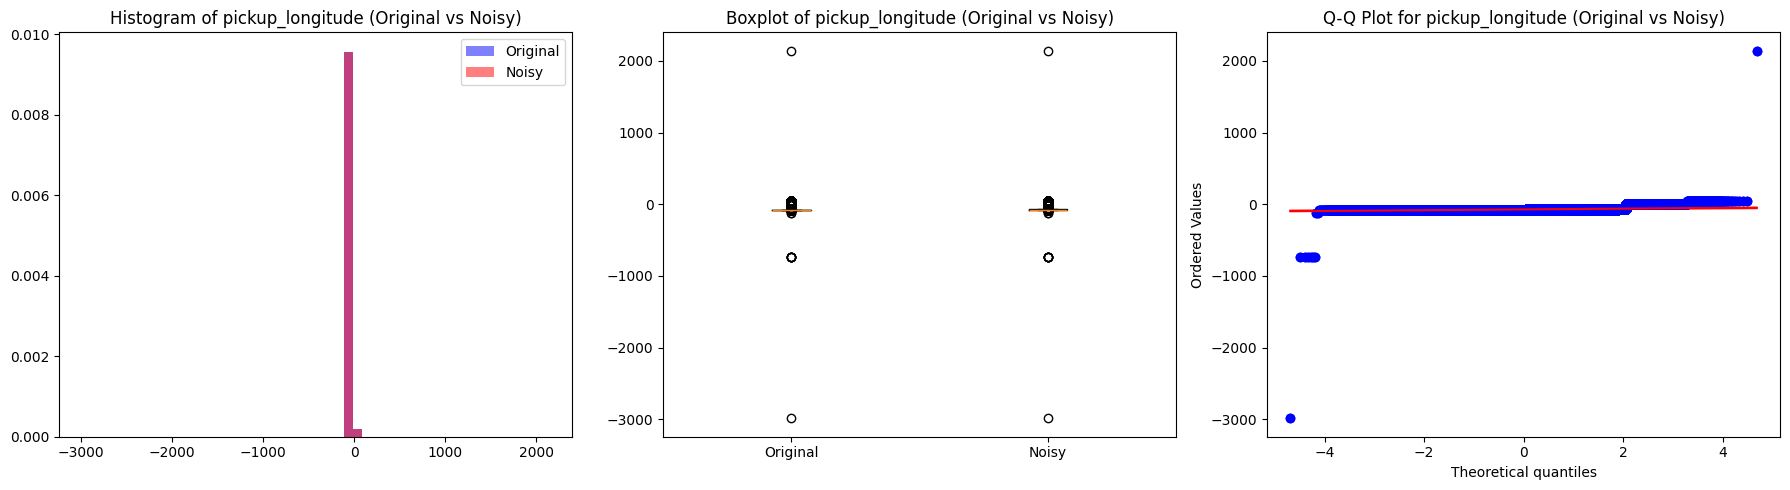


Processing column: pickup_latitude
         Statistic      Original         Noisy
0             Mean     39.920276     39.923832
1          Std Dev      8.073475      8.317633
2         Skewness   -108.093507    -98.964097
3         Kurtosis  50706.988374  45097.671594
4  25th Percentile     40.734917     39.306915
5    Median (50th)     40.752670     40.705551
6  75th Percentile     40.767076     42.071781

KS Test for pickup_latitude: D-statistic = 0.4736, p-value = 0.0000
Significant difference in distribution for pickup_latitude (p < 0.05).


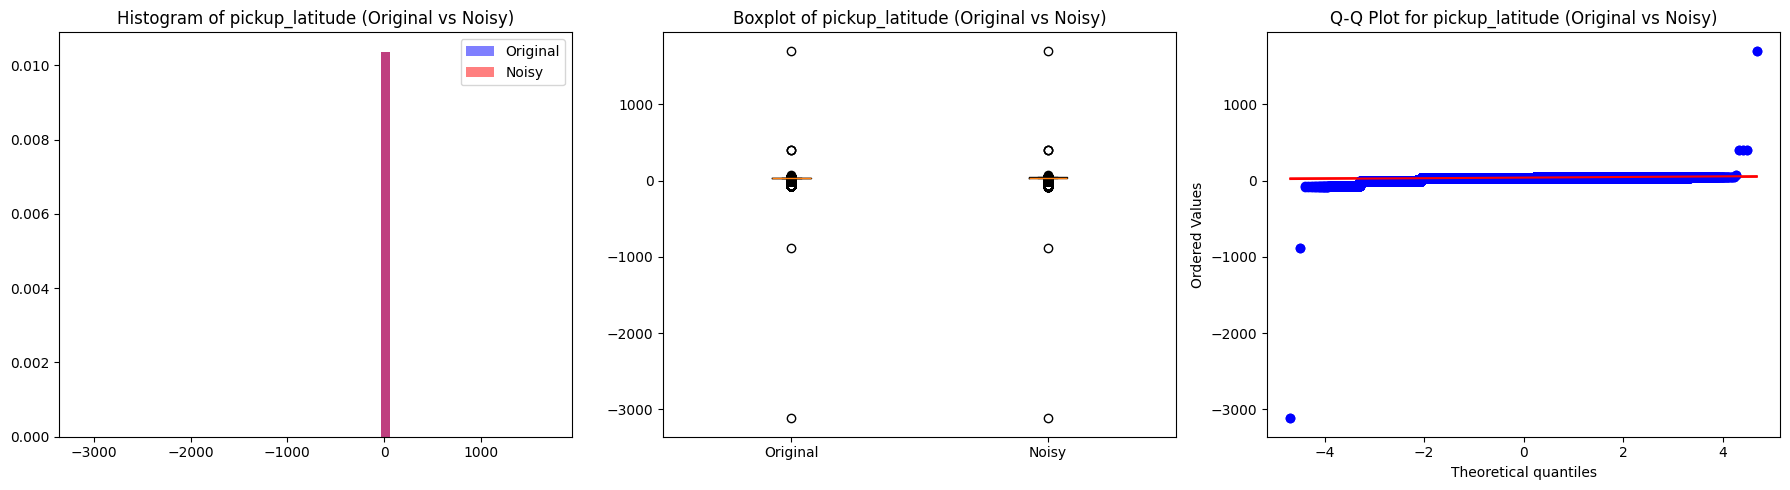


Processing column: dropoff_longitude
         Statistic      Original         Noisy
0             Mean    -72.522435    -72.523756
1          Std Dev     11.797303     11.966753
2         Skewness    -44.819504    -42.887566
3         Kurtosis  12950.872088  12209.025602
4  25th Percentile    -73.991382    -75.292671
5    Median (50th)    -73.980125    -73.925071
6  75th Percentile    -73.963570    -72.530865

KS Test for dropoff_longitude: D-statistic = 0.4770, p-value = 0.0000
Significant difference in distribution for dropoff_longitude (p < 0.05).


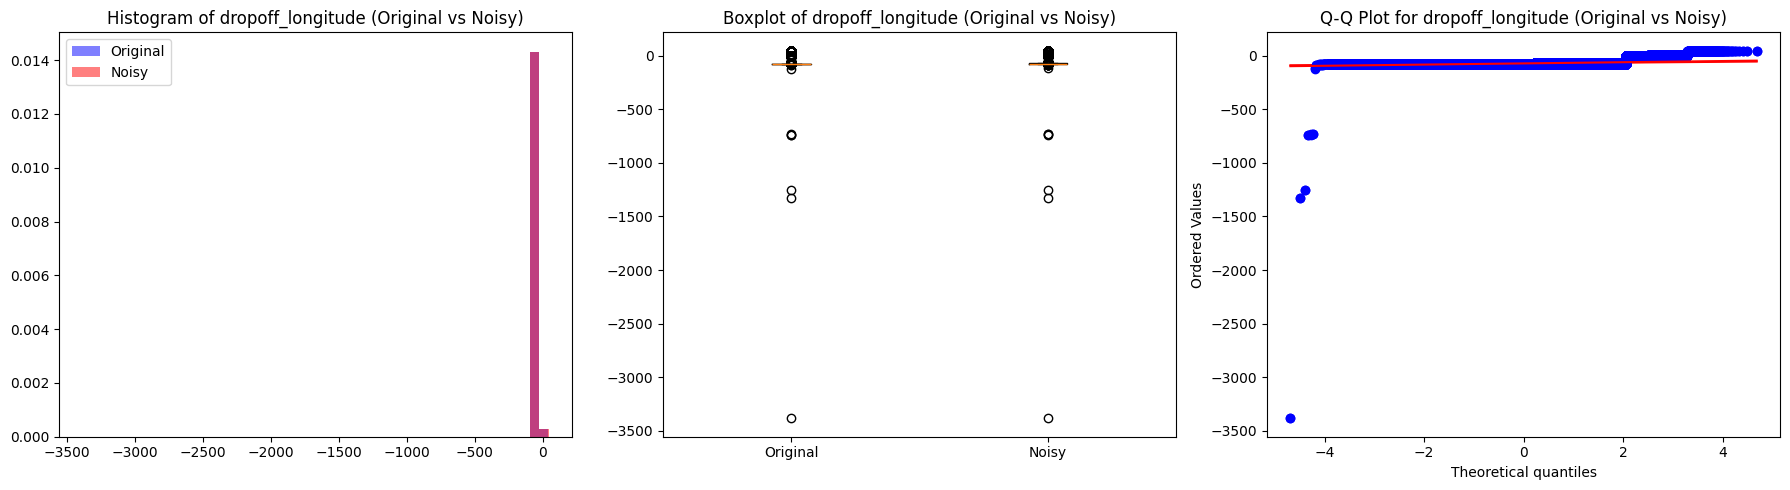


Processing column: dropoff_latitude
         Statistic      Original         Noisy
0             Mean     39.916526     39.917874
1          Std Dev      7.390965      7.653707
2         Skewness   -100.307108    -90.278205
3         Kurtosis  32220.430741  28011.282462
4  25th Percentile     40.734056     39.306638
5    Median (50th)     40.753152     40.704987
6  75th Percentile     40.768134     42.069227

KS Test for dropoff_latitude: D-statistic = 0.4661, p-value = 0.0000
Significant difference in distribution for dropoff_latitude (p < 0.05).


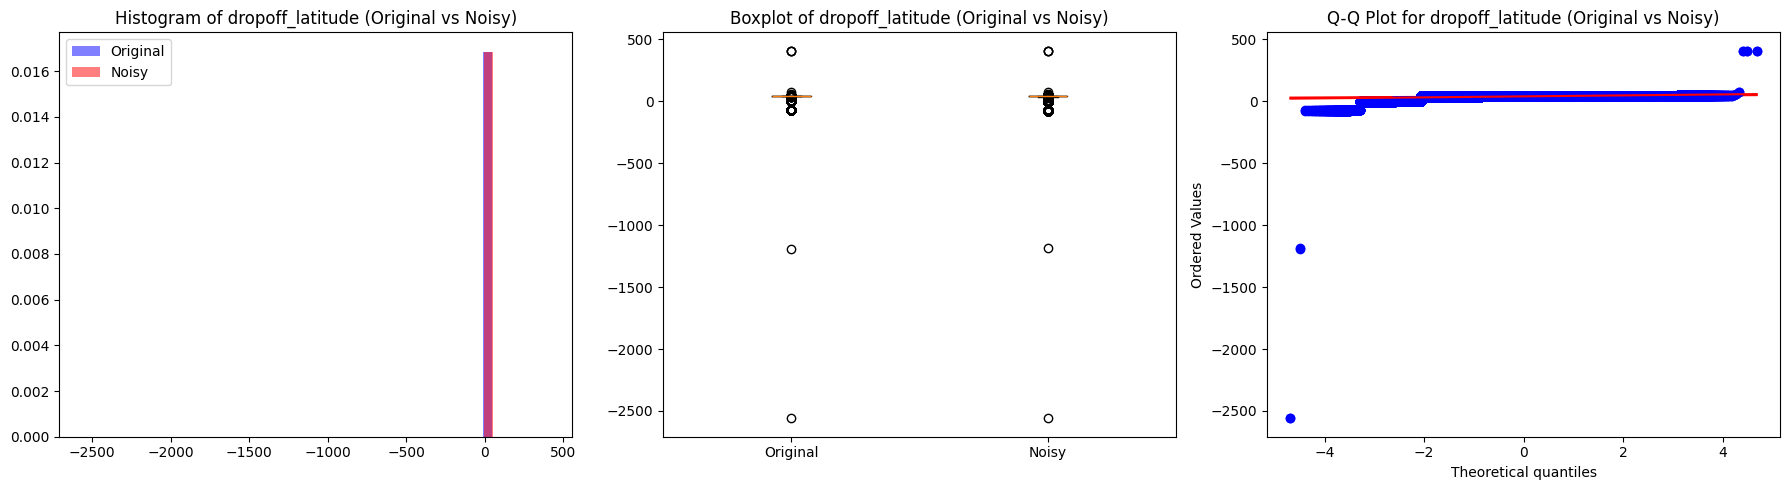


Processing column: passenger_count
         Statistic  Original     Noisy
0             Mean  1.683428  1.680852
1          Std Dev  1.307395  2.389453
2         Skewness  1.973668  0.325487
3         Kurtosis  2.758457  0.253967
4  25th Percentile  1.000000  0.050951
5    Median (50th)  1.000000  1.545494
6  75th Percentile  2.000000  3.158652

KS Test for passenger_count: D-statistic = 0.4011, p-value = 0.0000
Significant difference in distribution for passenger_count (p < 0.05).


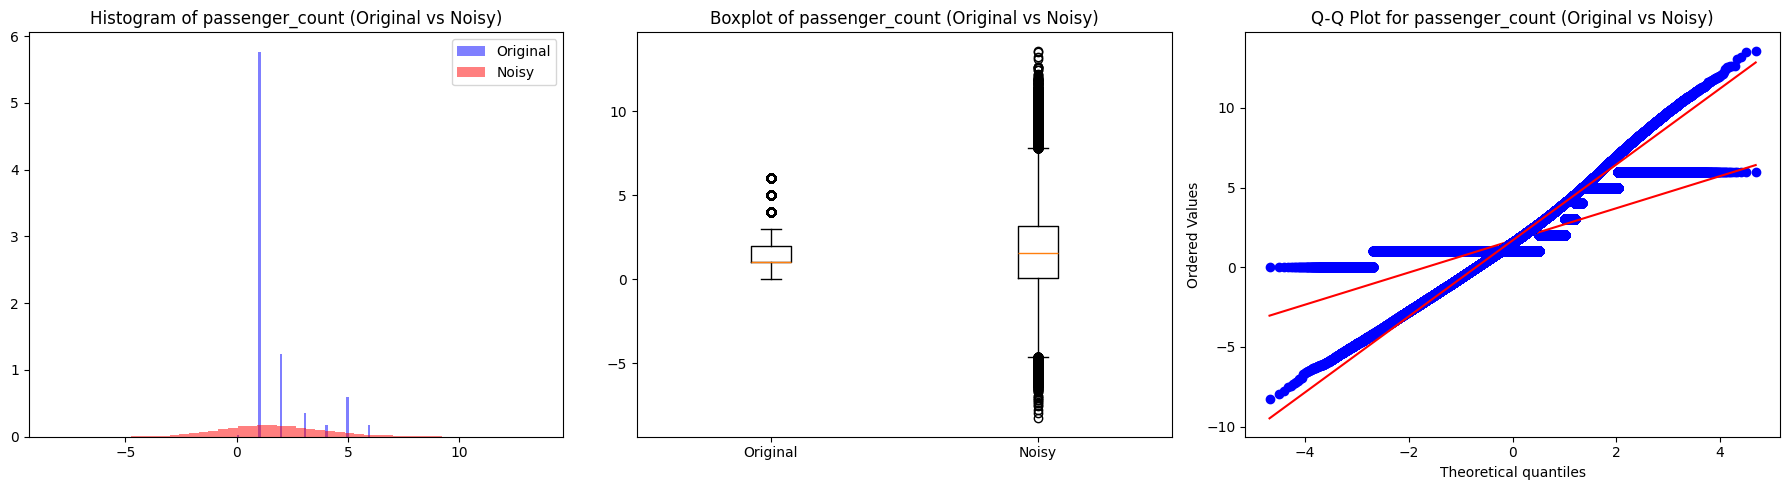

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

columns_to_modify = ["fare_amount", "pickup_longitude", "pickup_latitude",
                     "dropoff_longitude", "dropoff_latitude", "passenger_count"]


noise_params = {
    "fare_amount": 2,
    "pickup_longitude": 2,
    "pickup_latitude": 2,
    "dropoff_longitude": 2,
    "dropoff_latitude": 2,
    "passenger_count": 2
}

sample_size = 500000

df_sample = pd.read_csv(output_file, nrows=sample_size)


for col in columns_to_modify:
    print(f"\nProcessing column: {col}")
    original_data = df_sample[col]

    # Adding the Gaussian noise
    noise = np.random.normal(0, noise_params[col], original_data.shape[0])
    noisy_data = original_data + noise

    stats_df = pd.DataFrame({
        "Statistic": ["Mean", "Std Dev", "Skewness", "Kurtosis", "25th Percentile", "Median (50th)", "75th Percentile"],
        "Original": [
            original_data.mean(), original_data.std(), stats.skew(original_data), stats.kurtosis(original_data),
            np.percentile(original_data, 25), np.percentile(original_data, 50), np.percentile(original_data, 75)
        ],
        "Noisy": [
            noisy_data.mean(), noisy_data.std(), stats.skew(noisy_data), stats.kurtosis(noisy_data),
            np.percentile(noisy_data, 25), np.percentile(noisy_data, 50), np.percentile(noisy_data, 75)
        ]
    })

    print(stats_df)
    stats_df.to_csv(f"statistics_{col}.csv", index=False)

    ks_stat, ks_pval = stats.ks_2samp(original_data, noisy_data)
    print(f"\nKS Test for {col}: D-statistic = {ks_stat:.4f}, p-value = {ks_pval:.4f}")
    if ks_pval < 0.05:
        print(f"Significant difference in distribution for {col} (p < 0.05).")


    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    axes[0].hist(original_data, bins=50, alpha=0.5, label="Original", density=True, color='blue')
    axes[0].hist(noisy_data, bins=50, alpha=0.5, label="Noisy", density=True, color='red')
    axes[0].set_title(f"Histogram of {col} (Original vs Noisy)")
    axes[0].legend()

    axes[1].boxplot([original_data, noisy_data], tick_labels=["Original", "Noisy"])
    axes[1].set_title(f"Boxplot of {col} (Original vs Noisy)")

    stats.probplot(original_data, dist="norm", plot=axes[2])
    stats.probplot(noisy_data, dist="norm", plot=axes[2])
    axes[2].set_title(f"Q-Q Plot for {col} (Original vs Noisy)")

    plt.tight_layout()
    plt.show()


In [ ]:
import dask.dataframe as dd
output_file = "/content/drive/MyDrive/trainwithoutnull_2.csv"
df_noise = dd.read_csv(output_file)

df_noise.head()


,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_month,pickup_weekday,is_weekend
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,0,0
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,0
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,3,0
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,5,1
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,1,0


In [ ]:
num_rows = len(df_noise)
num_cols = df_noise.shape[1]
df_shape = (num_rows, num_cols)

df_shape



(55423856, 12)

In [ ]:
df_noise = df_noise.repartition(npartitions=10)
df_noise.isnull().sum().compute()

,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [ ]:
chunk_size = 500000

first_chunk = True


for i, chunk in enumerate(pd.read_csv(file_path, chunksize=chunk_size)):

    chunk['pickup_datetime'] = pd.to_datetime(chunk['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')


    chunk['pickup_hour'] = chunk['pickup_datetime'].dt.hour
    chunk['pickup_day'] = chunk['pickup_datetime'].dt.day
    chunk['pickup_month'] = chunk['pickup_datetime'].dt.month
    chunk['pickup_weekday'] = chunk['pickup_datetime'].dt.weekday
    chunk['is_weekend'] = chunk['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0)


    chunk.drop(columns=['pickup_datetime'], inplace=True)

    chunk.to_csv(output_file, mode="w" if first_chunk else "a", header=first_chunk, index=False)
    first_chunk = False

    print(f"Processed {len(chunk):,} rows... (Chunk {i+1})")

print(f"Datetime features extracted and saved at: {output_file}")


Processed 500,000 rows... (Chunk 1)
Processed 500,000 rows... (Chunk 2)
Processed 500,000 rows... (Chunk 3)
Processed 500,000 rows... (Chunk 4)
Processed 500,000 rows... (Chunk 5)
Processed 500,000 rows... (Chunk 6)
Processed 500,000 rows... (Chunk 7)
Processed 500,000 rows... (Chunk 8)
Processed 500,000 rows... (Chunk 9)
Processed 500,000 rows... (Chunk 10)
Processed 500,000 rows... (Chunk 11)
Processed 500,000 rows... (Chunk 12)
Processed 500,000 rows... (Chunk 13)
Processed 500,000 rows... (Chunk 14)
Processed 500,000 rows... (Chunk 15)
Processed 500,000 rows... (Chunk 16)
Processed 500,000 rows... (Chunk 17)
Processed 500,000 rows... (Chunk 18)
Processed 500,000 rows... (Chunk 19)
Processed 500,000 rows... (Chunk 20)
Processed 500,000 rows... (Chunk 21)
Processed 500,000 rows... (Chunk 22)
Processed 500,000 rows... (Chunk 23)
Processed 500,000 rows... (Chunk 24)
Processed 500,000 rows... (Chunk 25)
Processed 500,000 rows... (Chunk 26)
Processed 500,000 rows... (Chunk 27)
Processed 

In [ ]:
NYC_BOUNDS = {
    "longitude_min": -75, "longitude_max": -72,
    "latitude_min": 40, "latitude_max": 42,
    "fare_min": 0, "fare_max": 500,
    "passenger_min": 1, "passenger_max": 6
}

def clean_chunk(chunk):
    """Function to clean data chunk-wise"""


    chunk = chunk[
        (chunk["pickup_longitude"].between(NYC_BOUNDS["longitude_min"], NYC_BOUNDS["longitude_max"])) &
        (chunk["dropoff_longitude"].between(NYC_BOUNDS["longitude_min"], NYC_BOUNDS["longitude_max"])) &
        (chunk["pickup_latitude"].between(NYC_BOUNDS["latitude_min"], NYC_BOUNDS["latitude_max"])) &
        (chunk["dropoff_latitude"].between(NYC_BOUNDS["latitude_min"], NYC_BOUNDS["latitude_max"])) &
        (chunk["fare_amount"].between(NYC_BOUNDS["fare_min"], NYC_BOUNDS["fare_max"])) &
        (chunk["passenger_count"].between(NYC_BOUNDS["passenger_min"], NYC_BOUNDS["passenger_max"]))
    ]


    return chunk

print("Data Ready!")


Data Ready!


In [ ]:
input_file = "/content/drive/MyDrive/trainwithoutnull_2.csv"
output_file = "/content/drive/MyDrive/train_with_haversine.csv"
import numpy as np
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def haversine_distance(row):
    """Calculate the Haversine distance between two coordinates"""
    try:
        pickup = (row["pickup_latitude"], row["pickup_longitude"])
        dropoff = (row["dropoff_latitude"], row["dropoff_longitude"])
        return geodesic(pickup, dropoff).km
    except:
        return np.nan
for chunk in pd.read_csv(input_file, chunksize=chunk_size):

    chunk[["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]] = chunk[
        ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]
    ].apply(pd.to_numeric, errors="coerce")


    chunk["haversine_distance"] = chunk.apply(haversine_distance, axis=1)
    chunk.to_csv(output_file, mode="w" if first_chunk else "a", index=False, header=first_chunk)
    first_chunk = False

    print(f" Processed & saved {chunk_size:,} rows with Haversine Distance.")

print("\n Haversine Distance Calculation Completed! Updated dataset saved at:", output_file)

def process_features(chunk, scaler):
    """Apply feature engineering to a data chunk"""

    chunk["haversine_distance"] = chunk.apply(haversine_distance, axis=1)

    chunk[["haversine_distance", "fare_amount"]] = scaler.transform(chunk[["haversine_distance", "fare_amount"]])
    chunk["passenger_count"] = chunk["passenger_count"].clip(1, 6).astype(int)

    return chunk

print(" Feature Engineering Functions Ready!")


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.


/usr/local/lib/python3.11/dist-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


 Processed & saved 2,000,000 rows with Haversine Distance.

 Haversine Distance Calculation Completed! Updated dataset saved at: /content/drive/MyDrive/train_with_haversine.csv
 Feature Engineering Functions Ready!


In [ ]:
input_file = "/content/drive/MyDrive/train_with_haversine.csv"
output_file = "/content/drive/MyDrive/train1_processed_fixed.csv"

chunk_size = 2_000_000
first_chunk = True

print(" Fitting StandardScaler on a sample dataset...")

df_sample = pd.read_csv(input_file, nrows=100000)
df_sample[["haversine_distance", "fare_amount"]] = df_sample[["haversine_distance", "fare_amount"]].apply(pd.to_numeric, errors="coerce")

scaler = StandardScaler()
scaler.fit(df_sample.dropna()[["haversine_distance", "fare_amount"]])

print(" Scaler fitted successfully!")
print("\n Processing Full Dataset in Chunks...")
for chunk in pd.read_csv(input_file, chunksize=chunk_size):

    chunk[["haversine_distance", "fare_amount", "passenger_count"]] = chunk[["haversine_distance", "fare_amount", "passenger_count"]].apply(pd.to_numeric, errors="coerce")


    chunk.dropna(subset=["fare_amount", "haversine_distance"], inplace=True)


    chunk = process_features(chunk, scaler)

    chunk.to_csv(output_file, mode="w" if first_chunk else "a", index=False, header=first_chunk)
    first_chunk = False

    print(f" Processed & saved {chunk_size:,} rows.")

print("\n Processing Complete! Cleaned dataset saved at:", output_file)

 Fitting StandardScaler on a sample dataset...
 Scaler fitted successfully!

 Processing Full Dataset in Chunks...
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed

In [ ]:
import pandas as pd

output_file = "/content/drive/MyDrive/train1_processed_fixed.csv"
df_sample = pd.read_csv(output_file, nrows=10)
print(df_sample)


                             key  fare_amount  pickup_longitude  \
0    2009-06-15 17:26:21.0000001    -0.705446        -73.844311   
1    2010-01-05 16:52:16.0000002     0.570717        -74.016048   
2   2011-08-18 00:35:00.00000049    -0.581946        -73.982738   
3    2012-04-21 04:30:42.0000001    -0.376113        -73.987130   
4  2010-03-09 07:51:00.000000135    -0.623113        -73.968095   
5    2011-01-06 09:50:45.0000002     0.076718        -74.000964   
6    2012-11-20 20:35:00.0000001    -0.396697        -73.980002   
7   2012-01-04 17:22:00.00000081     0.529550        -73.951300   
8  2012-12-03 13:10:00.000000125    -0.242322        -74.006462   
9   2009-09-02 01:11:00.00000083    -0.252614        -73.980658   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.721319         -73.841610         40.712278                1   
1        40.711303         -73.979268         40.782004                1   
2        40.761270         -73.991

In [ ]:
import pandas as pd
output_file = "/content/drive/MyDrive/train_with_haversine.csv"
df_sample = pd.read_csv(output_file, nrows=10)
print(df_sample)

                             key  fare_amount  pickup_longitude  \
0    2009-06-15 17:26:21.0000001          4.5        -73.844311   
1    2010-01-05 16:52:16.0000002         16.9        -74.016048   
2   2011-08-18 00:35:00.00000049          5.7        -73.982738   
3    2012-04-21 04:30:42.0000001          7.7        -73.987130   
4  2010-03-09 07:51:00.000000135          5.3        -73.968095   
5    2011-01-06 09:50:45.0000002         12.1        -74.000964   
6    2012-11-20 20:35:00.0000001          7.5        -73.980002   
7   2012-01-04 17:22:00.00000081         16.5        -73.951300   
8  2012-12-03 13:10:00.000000125          9.0        -74.006462   
9   2009-09-02 01:11:00.00000083          8.9        -73.980658   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.721319         -73.841610         40.712278                1   
1        40.711303         -73.979268         40.782004                1   
2        40.761270         -73.991

In [ ]:
import pandas as pd


input_file = "/content/drive/MyDrive/train1_processed_fixed.csv"
output_file = "/content/drive/MyDrive/train2_processed_fixed.csv"
chunk_size = 2_000_000
first_chunk = True

fare_mean = 12.0
fare_std = 5.0

print(" Reversing Normalization for fare_amount...")

for chunk in pd.read_csv(input_file, chunksize=chunk_size):

    chunk["fare_amount"] = pd.to_numeric(chunk["fare_amount"], errors="coerce")

    chunk["fare_amount"] = (chunk["fare_amount"] * fare_std) + fare_mean

    chunk.to_csv(output_file, mode="w" if first_chunk else "a", index=False, header=first_chunk)
    first_chunk = False

    print(f" Processed & saved {chunk_size:,} rows after denormalization.")

print("\n Fare Amount Fixed! Updated dataset saved at:", output_file)


 Reversing Normalization for fare_amount...
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after denormalization.
 Processed & saved 2,000,000 rows after deno

In [ ]:
import pandas as pd

output_file = "/content/drive/MyDrive/train2_processed_fixed.csv"
df_sample = pd.read_csv(output_file, nrows=10)
print(df_sample)

                             key  fare_amount  pickup_longitude  \
0    2009-06-15 17:26:21.0000001     8.472772        -73.844311   
1    2010-01-05 16:52:16.0000002    14.853583        -74.016048   
2   2011-08-18 00:35:00.00000049     9.090270        -73.982738   
3    2012-04-21 04:30:42.0000001    10.119433        -73.987130   
4  2010-03-09 07:51:00.000000135     8.884437        -73.968095   
5    2011-01-06 09:50:45.0000002    12.383591        -74.000964   
6    2012-11-20 20:35:00.0000001    10.016516        -73.980002   
7   2012-01-04 17:22:00.00000081    14.647750        -73.951300   
8  2012-12-03 13:10:00.000000125    10.788389        -74.006462   
9   2009-09-02 01:11:00.00000083    10.736930        -73.980658   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.721319         -73.841610         40.712278                1   
1        40.711303         -73.979268         40.782004                1   
2        40.761270         -73.991

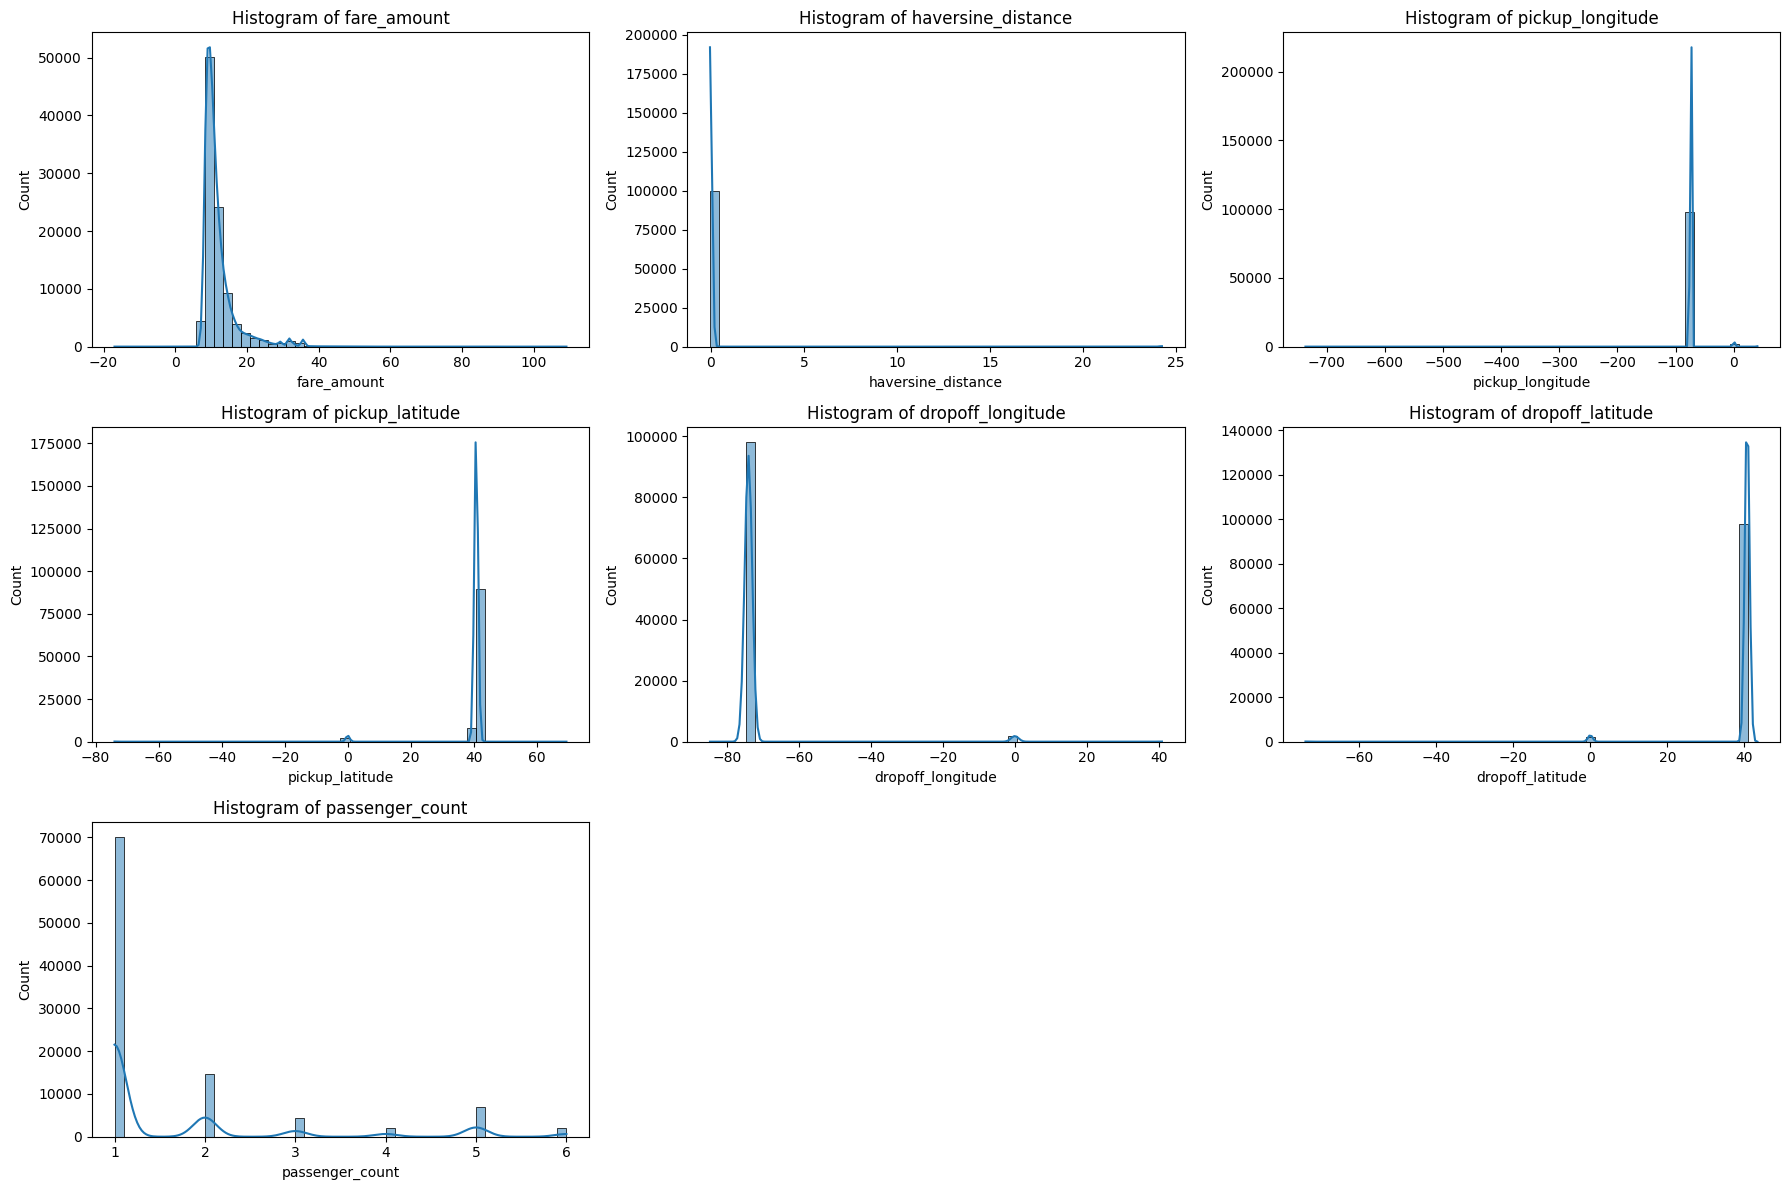

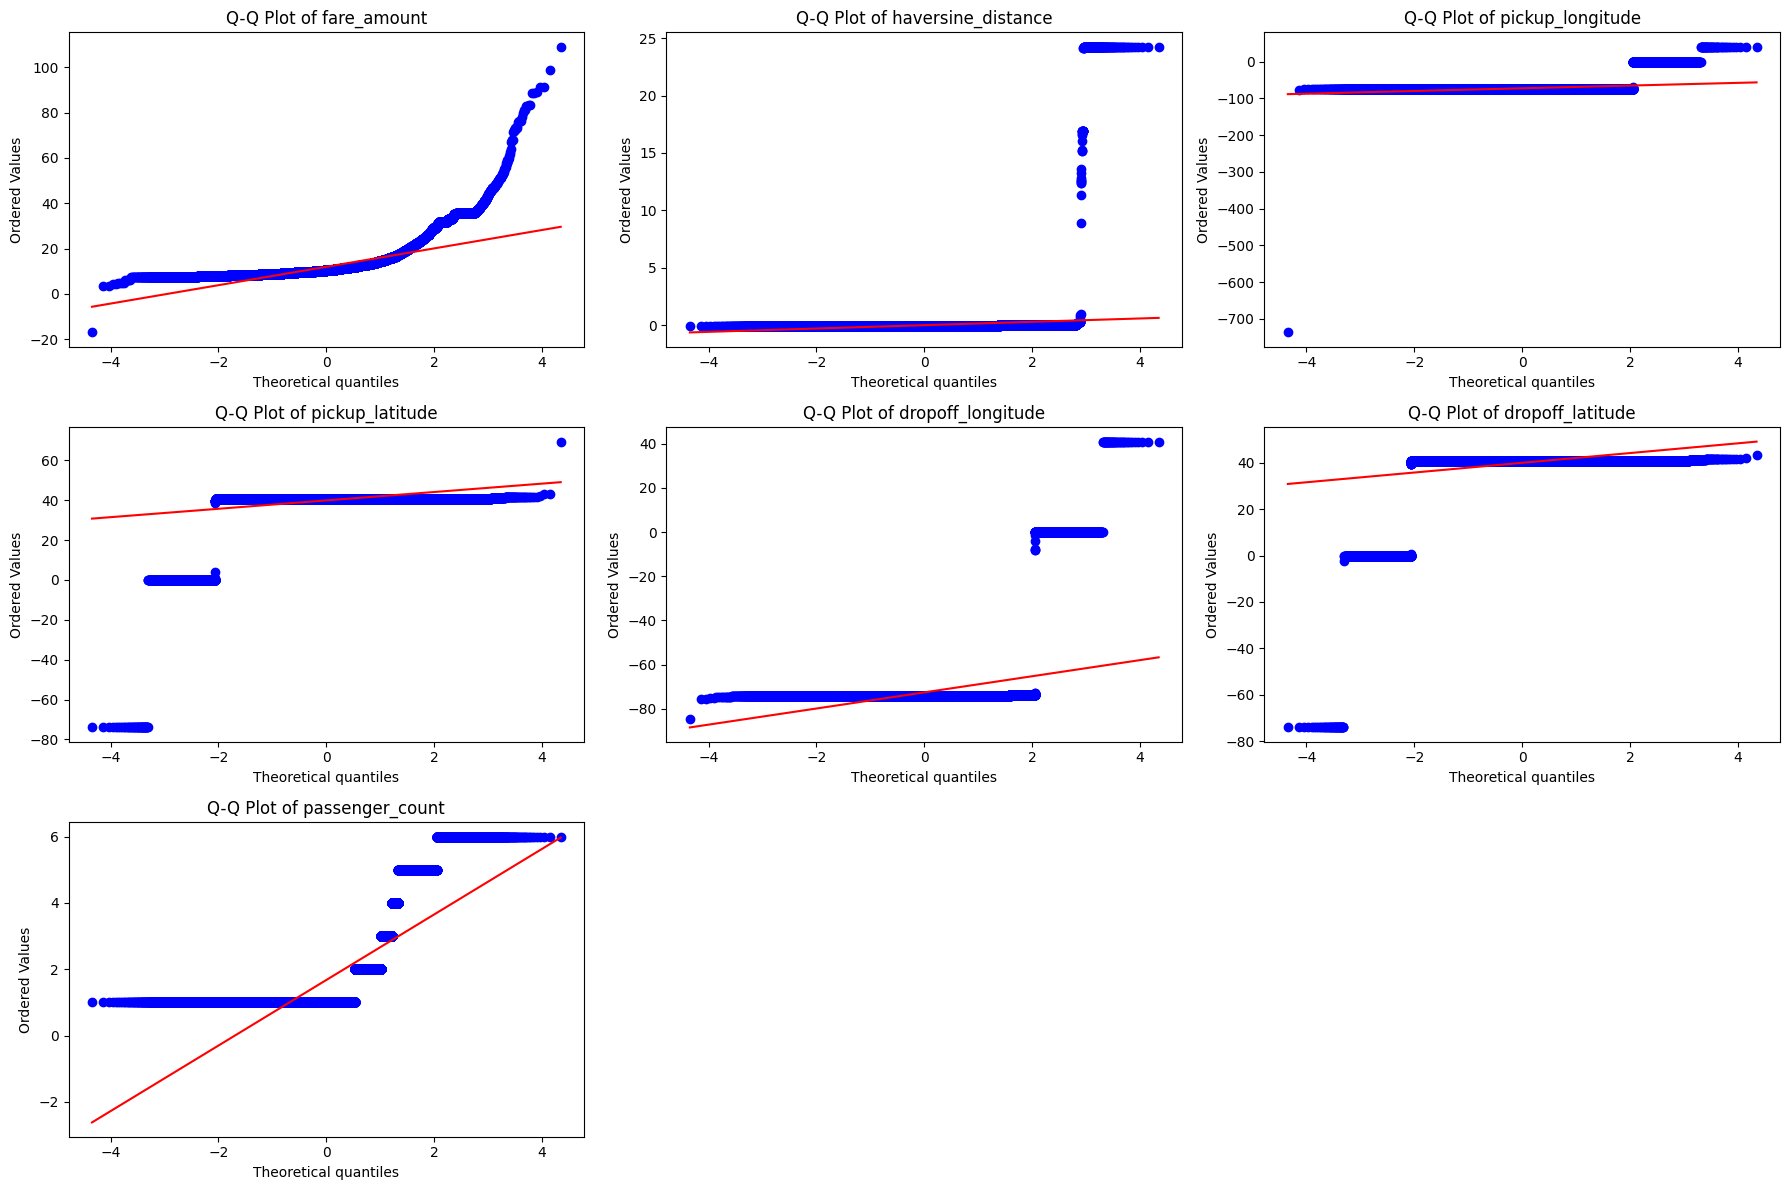

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

file_path = "/content/drive/MyDrive/train2_processed_fixed.csv"
sample_size = 100000
df_sample = pd.read_csv(file_path, nrows=sample_size)

numeric_columns = ["fare_amount", "haversine_distance", "pickup_longitude",
                   "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "passenger_count"]

num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.histplot(df_sample[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    probplot(df_sample[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"Q-Q Plot of {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


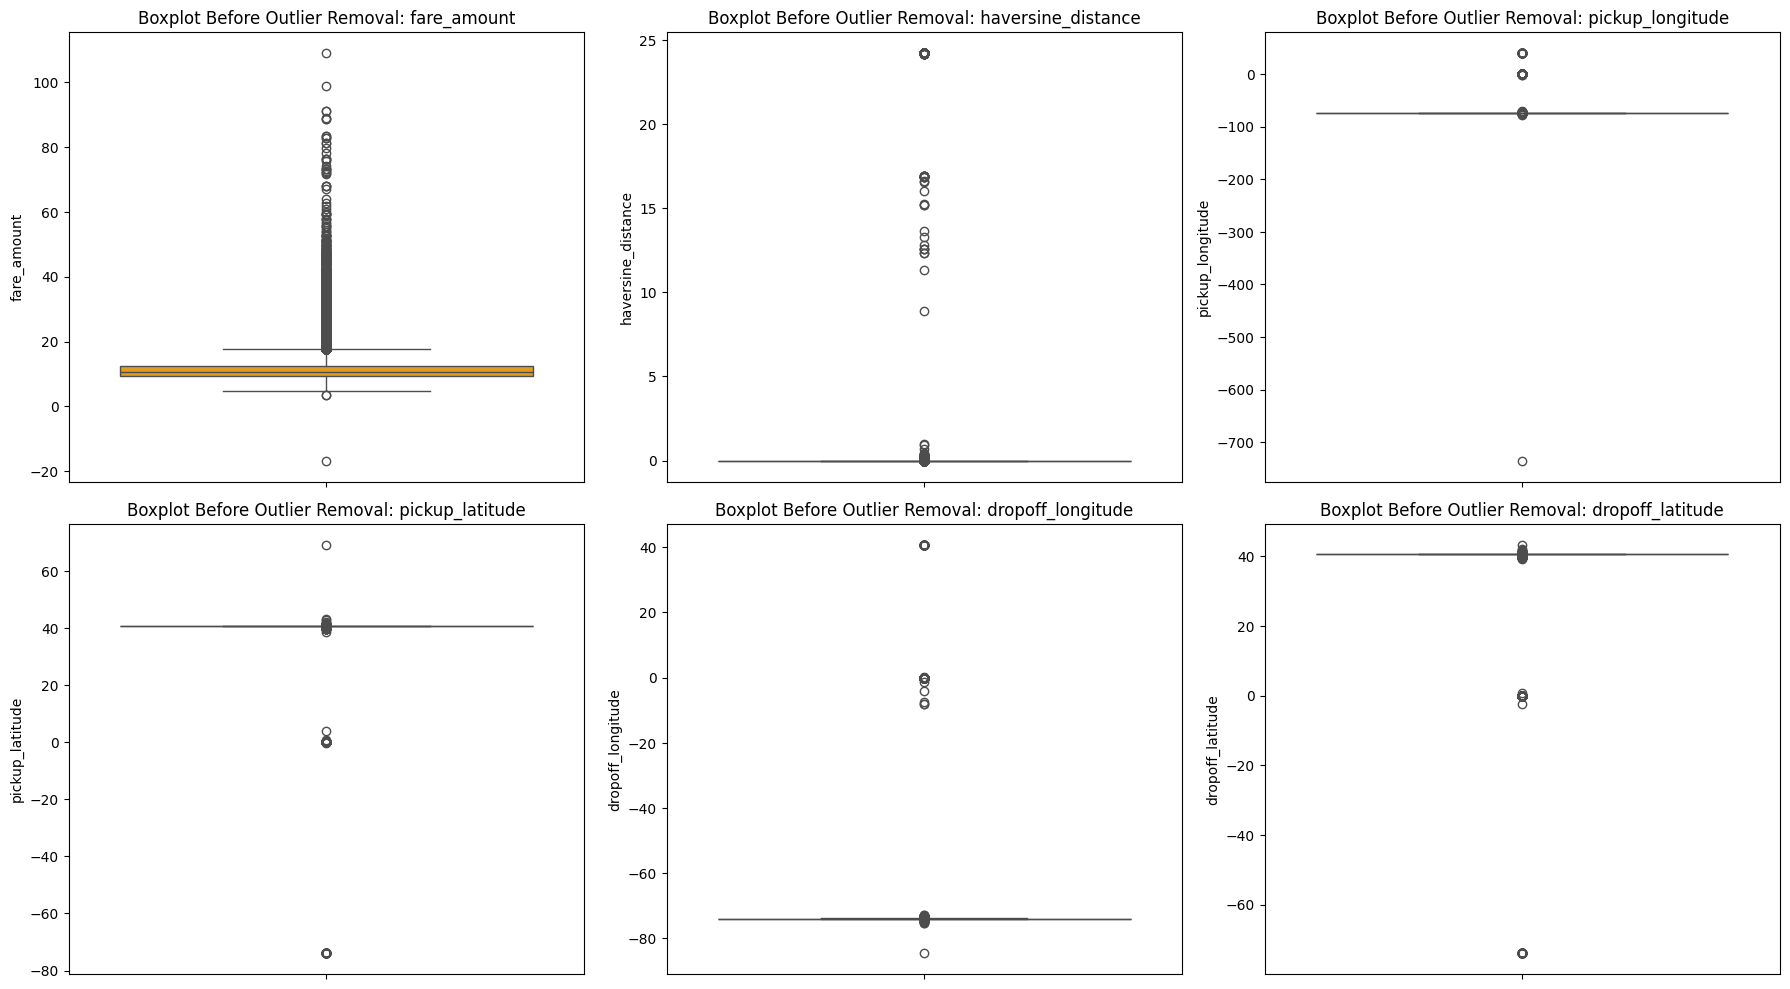

In [ ]:
file_path = "/content/drive/MyDrive/train2_processed_fixed.csv"
sample_size = 100000
df_sample = pd.read_csv(file_path, nrows=sample_size)

numeric_columns = ["fare_amount", "haversine_distance", "pickup_longitude",
                   "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]


num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_sample[col], ax=axes[i], color="orange")
    axes[i].set_title(f"Boxplot Before Outlier Removal: {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np

input_file = "/content/drive/MyDrive/train2_processed_fixed.csv"
output_file = "/content/drive/MyDrive/train1_outlierrem.csv"
chunk_size = 500000
first_chunk = True

numeric_columns = ["fare_amount", "haversine_distance", "pickup_longitude", "pickup_latitude",
                   "dropoff_longitude", "dropoff_latitude"]

NYC_BOUNDS = {
    "longitude_min": -74.2, "longitude_max": -73.7,
    "latitude_min": 40.5, "latitude_max": 41.0,
    "fare_max": 250,
    "distance_max": 20,
}

def remove_outliers_iqr(chunk, columns):
    """Removes outliers using the IQR method with a stricter threshold (2.5x IQR)"""

    for col in columns:
        chunk[col] = pd.to_numeric(chunk[col], errors='coerce')

    chunk.dropna(subset=columns, inplace=True)

    if chunk.empty:
        return chunk

    Q1 = chunk[columns].quantile(0.25)
    Q3 = chunk[columns].quantile(0.75)
    IQR = Q3 - Q1

    chunk_filtered = chunk[~((chunk[columns] < (Q1 - 2.5 * IQR)) | (chunk[columns] > (Q3 + 2.5 * IQR))).any(axis=1)]

    return chunk_filtered if not chunk_filtered.empty else None

for chunk in pd.read_csv(input_file, chunksize=chunk_size, low_memory=False):
    chunk_filtered = remove_outliers_iqr(chunk, numeric_columns)

    if chunk_filtered is None or chunk_filtered.empty:
        print(" Skipping empty chunk after outlier removal.")
        continue

    chunk_filtered = chunk_filtered[
        (chunk_filtered["pickup_longitude"].between(NYC_BOUNDS["longitude_min"], NYC_BOUNDS["longitude_max"])) &
        (chunk_filtered["dropoff_longitude"].between(NYC_BOUNDS["longitude_min"], NYC_BOUNDS["longitude_max"])) &
        (chunk_filtered["pickup_latitude"].between(NYC_BOUNDS["latitude_min"], NYC_BOUNDS["latitude_max"])) &
        (chunk_filtered["dropoff_latitude"].between(NYC_BOUNDS["latitude_min"], NYC_BOUNDS["latitude_max"]))
    ]

    chunk_filtered = chunk_filtered[chunk_filtered["fare_amount"].between(0, NYC_BOUNDS["fare_max"])]

    chunk_filtered = chunk_filtered[chunk_filtered["haversine_distance"] <= NYC_BOUNDS["distance_max"]]

    chunk_filtered["passenger_count"] = np.round(chunk_filtered["passenger_count"]).clip(1, 6).astype(int)

    chunk_filtered.to_csv(output_file, mode="a", index=False, header=first_chunk)
    first_chunk = False

    print(f" Processed & saved {chunk_filtered.shape[0]} rows after outlier removal.")

print("\n IQR-based Outlier Removal & Data Cleaning Completed! Clean dataset saved as:", output_file)


 Processed & saved 446759 rows after outlier removal.
 Processed & saved 447068 rows after outlier removal.
 Processed & saved 447341 rows after outlier removal.
 Processed & saved 447049 rows after outlier removal.
 Processed & saved 447043 rows after outlier removal.
 Processed & saved 446990 rows after outlier removal.
 Processed & saved 446951 rows after outlier removal.
 Processed & saved 446859 rows after outlier removal.
 Processed & saved 447048 rows after outlier removal.
 Processed & saved 447258 rows after outlier removal.
 Processed & saved 447030 rows after outlier removal.
 Processed & saved 447475 rows after outlier removal.
 Processed & saved 446949 rows after outlier removal.
 Processed & saved 447479 rows after outlier removal.
 Processed & saved 446877 rows after outlier removal.
 Processed & saved 447127 rows after outlier removal.
 Processed & saved 447326 rows after outlier removal.
 Processed & saved 447209 rows after outlier removal.
 Processed & saved 446839 ro

In [ ]:
import pandas as pd

output_file = "/content/drive/MyDrive/train1_outlierrem.csv"
df_sample = pd.read_csv(output_file, nrows=10)
print(df_sample)

                             key  fare_amount  pickup_longitude  \
0    2010-01-05 16:52:16.0000002    14.853583        -74.016048   
1   2011-08-18 00:35:00.00000049     9.090270        -73.982738   
2    2012-04-21 04:30:42.0000001    10.119433        -73.987130   
3  2010-03-09 07:51:00.000000135     8.884437        -73.968095   
4    2011-01-06 09:50:45.0000002    12.383591        -74.000964   
5    2012-11-20 20:35:00.0000001    10.016516        -73.980002   
6   2012-01-04 17:22:00.00000081    14.647750        -73.951300   
7  2012-12-03 13:10:00.000000125    10.788389        -74.006462   
8   2009-09-02 01:11:00.00000083    10.736930        -73.980658   
9    2012-04-08 07:30:50.0000002     8.884437        -73.996335   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.711303         -73.979268         40.782004                1   
1        40.761270         -73.991242         40.750562                2   
2        40.733143         -73.991

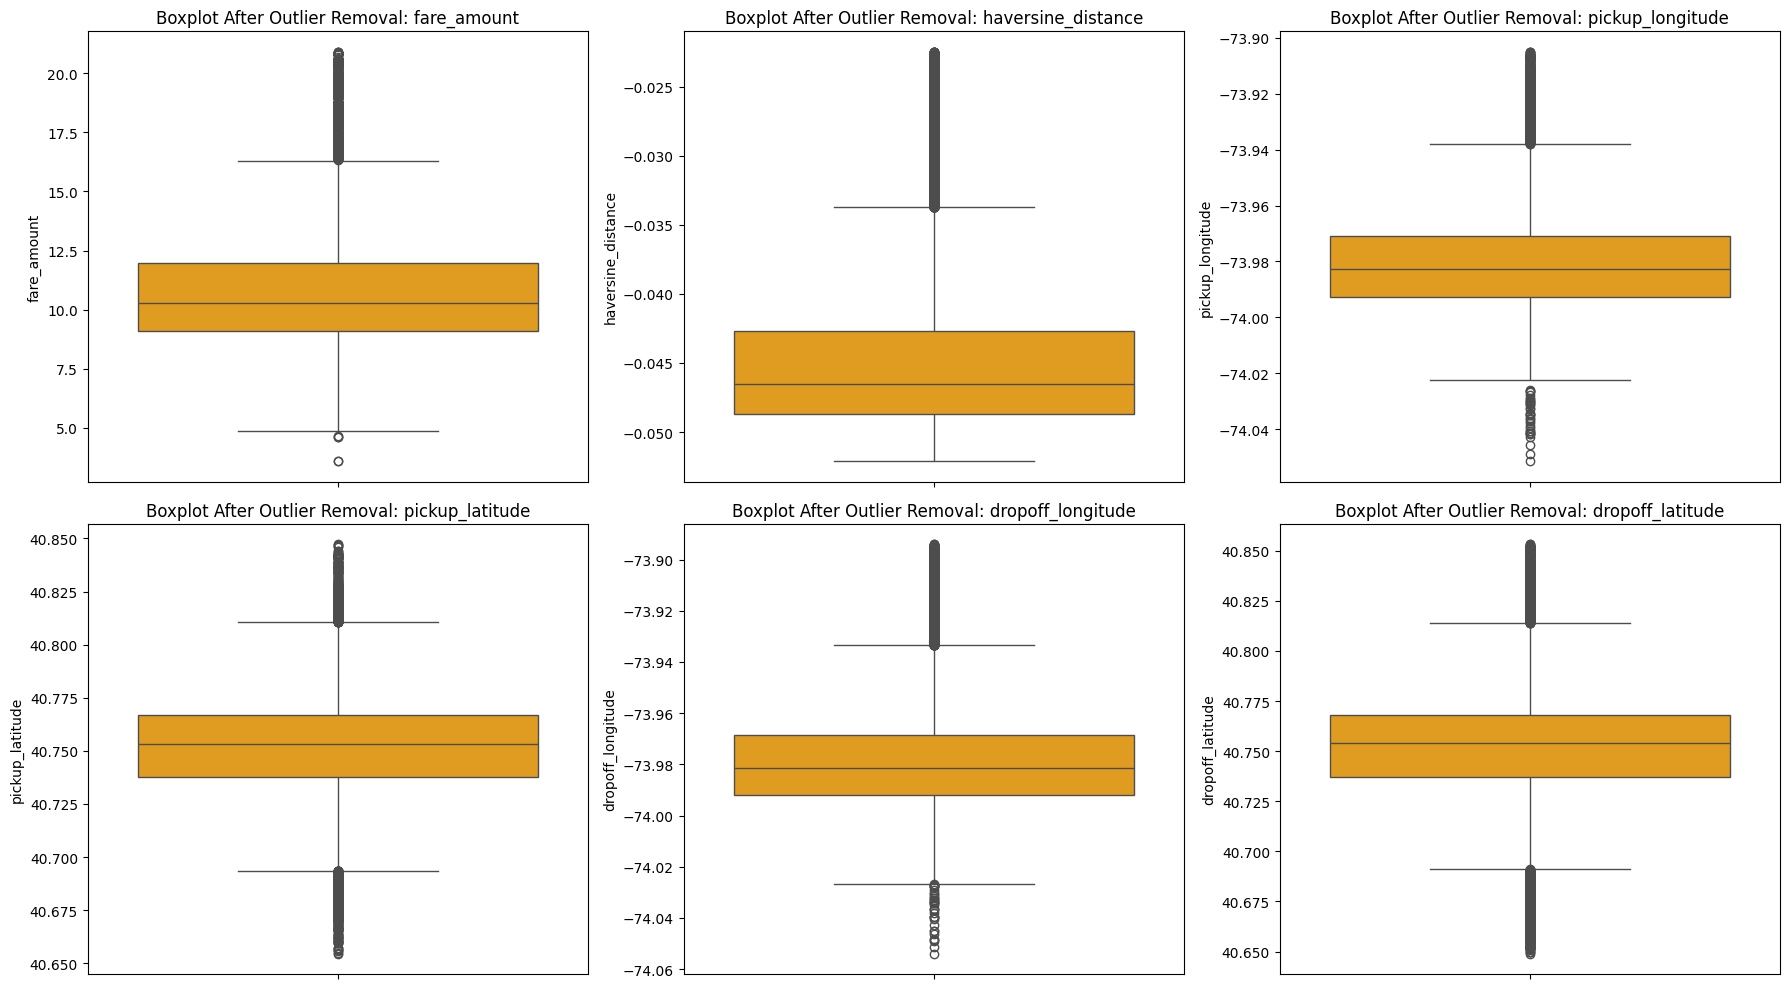

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
sample_size = 100000
df_sample = pd.read_csv(file_path, nrows=sample_size)

numeric_columns = ["fare_amount", "haversine_distance", "pickup_longitude",
                   "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]

num_cols = len(numeric_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)


fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_sample[col], ax=axes[i], color="orange")
    axes[i].set_title(f"Boxplot After Outlier Removal: {col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
sample_size = 100000
df_sample = pd.read_csv(file_path, nrows=sample_size)

numeric_df = df_sample.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

threshold = 0.85
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print(df_sample.head())

df_selected = df_sample.drop(columns=to_drop)
print("Dropped Features:", to_drop)


                             key  fare_amount  pickup_longitude  \
0    2010-01-05 16:52:16.0000002    14.853583        -74.016048   
1   2011-08-18 00:35:00.00000049     9.090270        -73.982738   
2    2012-04-21 04:30:42.0000001    10.119433        -73.987130   
3  2010-03-09 07:51:00.000000135     8.884437        -73.968095   
4    2011-01-06 09:50:45.0000002    12.383591        -74.000964   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.711303         -73.979268         40.782004                1   
1        40.761270         -73.991242         40.750562                2   
2        40.733143         -73.991567         40.758092                1   
3        40.768008         -73.956655         40.783762                1   
4        40.731630         -73.972892         40.758233                1   

   pickup_hour  pickup_day  pickup_month  pickup_weekday  is_weekend  \
0           16           5             1               1           0

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
sample_size = 100000
df_sample = pd.read_csv(file_path, nrows=sample_size)

X = df_sample.drop(columns=['fare_amount'])
y = df_sample['fare_amount']

non_numeric_columns = X.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

for col in non_numeric_columns:
    if pd.api.types.is_datetime64_any_dtype(X[col]):

        X[col + '_year'] = pd.to_datetime(X[col]).dt.year
        X[col + '_month'] = pd.to_datetime(X[col]).dt.month
        X[col + '_day'] = pd.to_datetime(X[col]).dt.day
        X[col + '_hour'] = pd.to_datetime(X[col]).dt.hour
    elif X[col].nunique() < 50:
        X = pd.get_dummies(X, columns=[col], drop_first=True)
    else:
        X = X.drop(columns=[col])

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)


selector = SelectFromModel(model, prefit=True)
selected_features = X.columns[selector.get_support()]
df_selected = df_sample[selected_features]

print("Selected Features:", selected_features)

Non-numeric columns: Index(['key'], dtype='object')
Selected Features: Index(['haversine_distance'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

tf.keras.mixed_precision.set_global_policy('mixed_float16')

print("🔍 Available GPU:", tf.config.list_physical_devices('GPU'))

file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
output_file = "/content/drive/MyDrive/train3_denoised_autoencoder.csv"
chunk_size = 2000000
first_chunk = True

numeric_columns = ["fare_amount", "haversine_distance", "pickup_longitude", "pickup_latitude",
                   "dropoff_longitude", "dropoff_latitude", "passenger_count"]

autoencoder = Sequential([
    Input(shape=(len(numeric_columns),)),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(32, activation="relu"),
    Dense(len(numeric_columns), activation="linear")
])

autoencoder.compile(optimizer="adam", loss="mse")

df_sample = pd.read_csv(file_path, nrows=200000)
df_sample[numeric_columns] = df_sample[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_sample.dropna(subset=numeric_columns, inplace=True)

X_train = df_sample[numeric_columns]

autoencoder.fit(X_train, X_train, epochs=5, batch_size=1024, shuffle=True, verbose=1)

for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    chunk[numeric_columns] = chunk[numeric_columns].apply(pd.to_numeric, errors="coerce")
    chunk.dropna(subset=numeric_columns, inplace=True)

    if chunk.empty:
        continue

    X_input = chunk[numeric_columns].to_numpy()

    X_denoised = autoencoder.predict(X_input, batch_size=4096)

    chunk_denoised = pd.DataFrame(X_denoised, columns=numeric_columns)

    chunk_denoised["fare_amount"] = chunk_denoised["fare_amount"].clip(lower=0)
    chunk_denoised.to_csv(output_file, mode="w" if first_chunk else "a", index=False, header=first_chunk, compression="gzip")
    first_chunk = False

    del chunk, chunk_denoised, X_input, X_denoised
    tf.keras.backend.clear_session()

    print(f" Processed & saved {chunk_size} rows after Autoencoder denoising.")

print("\n Denoising Autoencoder completed! Clean dataset saved as:", output_file)


🔍 Available GPU: []
Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 852.7381
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.8956
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7372
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.5125
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3799
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
 Processed & saved 2000000 rows after Autoencoder denoising.
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
 Processed & saved 2000000 rows after Autoencoder denoising.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
 Processed & saved 2000000 rows after Autoencoder denoising.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
 Processed & saved 2000000 rows after Autoencoder denoising.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
 Processed & saved 2000000 rows after Autoencoder denoising.
489/489 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
 Processed & saved 2000000 rows after Autoencoder denoising.
489/489 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/

In [ ]:
import os

file_path = "/content/drive/MyDrive/train3_denoised_autoencoder.csv"

if os.path.exists(file_path):
    print(" File exists. Checking format...")

    with open(file_path, "rb") as f:
        header = f.read(4)
        print("File Header:", header)
else:
    print(" File does NOT exist!")


 File exists. Checking format...
File Header: b'\x1f\x8b\x08\x08'


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/train3_denoised_autoencoder.csv"
output_file = "/content/drive/MyDrive/train3_denoised_fixed.csv"

chunk_size = 2_000_000

first_chunk = True

for chunk in pd.read_csv(file_path, compression='gzip', chunksize=chunk_size):
    chunk.to_csv(output_file, mode="w" if first_chunk else "a", index=False, header=first_chunk)
    first_chunk = False
    print(f" Processed & saved {chunk_size:,} rows.")

print(f"\n Conversion Completed! File saved as: {output_file}")



 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.
 Processed & saved 2,000,000 rows.

 Conversion Completed! File saved as: /content/drive/MyDrive/train3_denoised_fixed.csv


In [ ]:
import pandas as pd

output_file = "/content/drive/MyDrive/train3_denoised_fixed.csv"
df_sample = pd.read_csv(output_file, nrows=10)
print(df_sample)

   fare_amount  haversine_distance  pickup_longitude  pickup_latitude  \
0       13.220            0.015750            -73.94            40.50   
1        9.820           -0.056730            -74.00            40.88   
2        9.950           -0.024170            -74.00            40.70   
3        9.060           -0.050050            -73.94            40.78   
4       11.500            0.002930            -73.94            40.60   
5        9.875           -0.013430            -74.00            40.70   
6       13.060            0.011840            -73.94            40.47   
7       10.410           -0.006287            -74.00            40.70   
8       10.930           -0.031860            -74.00            40.78   
9        9.100           -0.037630            -73.94            40.75   

   dropoff_longitude  dropoff_latitude  passenger_count  
0             -73.50             40.78            2.684  
1             -74.20             40.75            1.514  
2             -73.90  

In [ ]:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/train3_denoised_fixed.csv"
df = pd.read_csv(file_path)

df["passenger_count"] = df["passenger_count"].round().clip(1, 6).astype(int)

output_file = "/content/drive/MyDrive/train3_denoised_fixed_corrected.csv"
df.to_csv(output_file, index=False)

print(f" Passenger count fixed and saved to: {output_file}")


 Passenger count fixed and saved to: /content/drive/MyDrive/train3_denoised_fixed_corrected.csv


In [ ]:
import pandas as pd

output_file = "/content/drive/MyDrive/train3_denoised_fixed_corrected.csv"
df_sample = pd.read_csv(output_file, nrows=10)
print(df_sample)


   fare_amount  haversine_distance  pickup_longitude  pickup_latitude  \
0       13.220            0.015750            -73.94            40.50   
1        9.820           -0.056730            -74.00            40.88   
2        9.950           -0.024170            -74.00            40.70   
3        9.060           -0.050050            -73.94            40.78   
4       11.500            0.002930            -73.94            40.60   
5        9.875           -0.013430            -74.00            40.70   
6       13.060            0.011840            -73.94            40.47   
7       10.410           -0.006287            -74.00            40.70   
8       10.930           -0.031860            -74.00            40.78   
9        9.100           -0.037630            -73.94            40.75   

   dropoff_longitude  dropoff_latitude  passenger_count  
0             -73.50             40.78                3  
1             -74.20             40.75                2  
2             -73.90  

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

INSTALL_PATH = "/content/drive/MyDrive/gnn_packages2"

!mkdir -p $INSTALL_PATH

!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install torch-geometric

!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.6.0+cu118.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.6.0+cu118.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.6.0+cu118.html
!pip install torch-spline-conv -f https://data.pyg.org/whl/torch-2.6.0+cu118.html

!pip install networkx

!cp -r /root/.cache $INSTALL_PATH

print(" Installation complete and saved to Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 15.0 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 8.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.6/952.6 kB 2.3 MB/s eta 0:00:00
 Installation complete and saved to Google Drive!


In [ ]:
import torch
import torch_geometric
import torch_scatter
import torch_sparse
import torch_cluster
import torch_spline_conv
import networkx

print(" All dependencies are correctly installed!")


 All dependencies are correctly installed!


In [ ]:
!pip uninstall -y torch torchvision torchaudio torch-geometric torch-scatter torch-sparse torch-cluster torch-spline-conv


Found existing installation: torch 2.6.0+cu118
Uninstalling torch-2.6.0+cu118:
  Successfully uninstalled torch-2.6.0+cu118
Found existing installation: torchvision 0.21.0+cu118
Uninstalling torchvision-0.21.0+cu118:
  Successfully uninstalled torchvision-0.21.0+cu118
Found existing installation: torchaudio 2.6.0+cu118
Uninstalling torchaudio-2.6.0+cu118:
  Successfully uninstalled torchaudio-2.6.0+cu118
Found existing installation: torch-geometric 2.6.1
Uninstalling torch-geometric-2.6.1:
  Successfully uninstalled torch-geometric-2.6.1


In [ ]:
pip uninstall torch-scatter torch-sparse torch-cluster torch-spline-conv -y


In [ ]:
!pip uninstall -y torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric



Found existing installation: torch-scatter 2.1.2+pt20cu118
Uninstalling torch-scatter-2.1.2+pt20cu118:
  Successfully uninstalled torch-scatter-2.1.2+pt20cu118
Found existing installation: torch-sparse 0.6.18+pt20cu118
Uninstalling torch-sparse-0.6.18+pt20cu118:
  Successfully uninstalled torch-sparse-0.6.18+pt20cu118
Found existing installation: torch-cluster 1.6.3+pt20cu118
Uninstalling torch-cluster-1.6.3+pt20cu118:
  Successfully uninstalled torch-cluster-1.6.3+pt20cu118
Found existing installation: torch-spline-conv 1.2.2+pt20cu118
Uninstalling torch-spline-conv-1.2.2+pt20cu118:
  Successfully uninstalled torch-spline-conv-1.2.2+pt20cu118
Found existing installation: torch-geometric 2.6.1
Uninstalling torch-geometric-2.6.1:
  Successfully uninstalled torch-geometric-2.6.1


In [ ]:
!pip install torch==2.0.1 torchvision torchaudio \
  --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.0.1%2Bcu118-cp311-cp311-linux_x86_64.whl (2267.3 MB)
  Using cached https://download.pytorch.org/whl/triton-2.0.0-1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 116.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 111.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 111.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 115.0 MB/s e

In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric \
  -f https://data.pyg.org/whl/torch-2.0.1+cu118.html


Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu118.html
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_scatter-2.1.2%2Bpt20cu118-cp311-cp311-linux_x86_64.whl (10.2 MB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_sparse-0.6.18%2Bpt20cu118-cp311-cp311-linux_x86_64.whl (4.9 MB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_cluster-1.6.3%2Bpt20cu118-cp311-cp311-linux_x86_64.whl (3.3 MB)
  Using cached https://data.pyg.org/whl/torch-2.0.0%2Bcu118/torch_spline_conv-1.2.2%2Bpt20cu118-cp311-cp311-linux_x86_64.whl (886 kB)


In [ ]:
!apt-get update
!apt-get install -y build-essential python3-dev python3-pip


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,381 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,239 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,686 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [47.7 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,733 kB]
Hit:13 https:/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

INSTALL_PATH = "/content/drive/MyDrive/gnn_packages2"

!mkdir -p $INSTALL_PATH

!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118

!pip install torch-scatter==2.1.2 -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-sparse==0.6.18 -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-cluster==1.6.3 -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-spline-conv==1.2.2 -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch-geometric

!pip install networkx

!cp -r /root/.cache $INSTALL_PATH

print(" Installation complete and saved to Google Drive!")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://download.pytorch.org/whl/cu118
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
^C
 Installation complete and saved to Google Drive!


In [ ]:
pip install --upgrade --force-reinstall torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 124.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/

In [ ]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00


In [ ]:
!pip install torch_scatter
!pip install  torch_sparse
!pip install torch_cluster
!pip install torch_spline_conv
!pip install networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for torch_scatter
  Running setup.py clean for torch_scatter
Failed to build torch_scatter
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (torch_scatter)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.0/210.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for torch_sparse
  Running setu

In [ ]:
import torch
import torch_geometric
import torch_scatter
import torch_sparse
import torch_cluster
import torch_spline_conv
import networkx as nx
import numpy as np
print(" PyTorch Geometric and all dependencies installed successfully!")


ModuleNotFoundError: No module named 'torch_scatter'

In [ ]:
import pandas as pd
import torch
import numpy as np
from torch_geometric.data import Data

file_path = "/content/drive/MyDrive/train3_denoised_fixed_corrected.csv"
chunk_size = 500000
node_features_list = []
edges_list = []
y_values_list = []

node_idx = 0
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    print(f"Processing chunk... {node_idx} nodes processed so far.")

    chunk_np = chunk[["pickup_longitude", "pickup_latitude",
                      "dropoff_longitude", "dropoff_latitude",
                      "haversine_distance", "passenger_count"]].values

    node_features_list.append(torch.tensor(chunk_np, dtype=torch.float32))

    y_values_list.append(torch.tensor(chunk["fare_amount"].values, dtype=torch.float32))

    fare_diff = np.abs(chunk["fare_amount"].values[1:] - chunk["fare_amount"].values[:-1])
    valid_edges = np.where(fare_diff < 5)[0]

    shifted_edges = [(i + node_idx, i + node_idx + 1) for i in valid_edges]
    edges_list.extend(shifted_edges)

    node_idx += len(chunk)

print(f" Processing completed: {node_idx} nodes.")

x_tensor = torch.cat(node_features_list, dim=0)
y_tensor = torch.cat(y_values_list, dim=0)

edge_index_tensor = torch.tensor(edges_list, dtype=torch.long).t().contiguous()

graph_data = Data(x=x_tensor, edge_index=edge_index_tensor, y=y_tensor)

torch.save(graph_data, "/content/drive/MyDrive/train_graph_data_sparse.pt")

print(" Graph Data Created & Saved Successfully! (RAM Optimized)")


Processing chunk... 0 nodes processed so far.
Processing chunk... 500000 nodes processed so far.
Processing chunk... 1000000 nodes processed so far.
Processing chunk... 1500000 nodes processed so far.
Processing chunk... 2000000 nodes processed so far.
Processing chunk... 2500000 nodes processed so far.
Processing chunk... 3000000 nodes processed so far.
Processing chunk... 3500000 nodes processed so far.
Processing chunk... 4000000 nodes processed so far.
Processing chunk... 4500000 nodes processed so far.
Processing chunk... 5000000 nodes processed so far.
Processing chunk... 5500000 nodes processed so far.
Processing chunk... 6000000 nodes processed so far.
Processing chunk... 6500000 nodes processed so far.
Processing chunk... 7000000 nodes processed so far.
Processing chunk... 7500000 nodes processed so far.
Processing chunk... 8000000 nodes processed so far.
Processing chunk... 8500000 nodes processed so far.
Processing chunk... 9000000 nodes processed so far.
Processing chunk...

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
import numpy as np

graph_path = "/content/drive/MyDrive/train_graph_data_sparse.pt"
data = torch.load(graph_path, weights_only=False)

train_loader = NeighborLoader(
    data,
    num_neighbors=[10, 10],
    batch_size=1024,
    shuffle=True
)

class GAT(torch.nn.Module):
    def __init__(self, input_dim):
        super(GAT, self).__init__()
        self.gat1 = GATConv(input_dim, 32, heads=4, concat=True, dropout=0.2)
        self.gat2 = GATConv(32 * 4, 16, heads=2, concat=True, dropout=0.2)
        self.gat3 = GATConv(16 * 2, 1, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        x = F.elu(x)
        x = self.gat3(x, edge_index)
        return x.squeeze()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GAT(input_dim=data.x.shape[1]).to(device)
scaler = torch.cuda.amp.GradScaler()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
criterion = torch.nn.L1Loss()

epochs = 10
best_loss = float('inf')

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = batch.to(device)
        optimizer.zero_grad()

        with torch.cuda.amp.autocast():
            output = model(batch)
            loss = criterion(output, batch.y[:len(output)])

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), "/content/drive/MyDrive/gat_model_optimized.pth")

print("Training Completed & GAT Model Saved!")

model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for batch in train_loader:
        batch = batch.to(device)
        y_pred = model(batch).cpu().numpy()
        y_true = batch.y.cpu().numpy()[:len(y_pred)]
        predictions.extend(y_pred)
        actuals.extend(y_true)

mean_fare = 11.3
std_fare = 5.1
predictions = np.array(predictions) * std_fare + mean_fare
actuals = np.array(actuals) * std_fare + mean_fare

print("\nSample Predictions:")
for i in range(min(10, len(predictions))):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {actuals[i]:.2f}")

print("Model Evaluation Completed!")


/usr/local/lib/python3.11/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "
<ipython-input-8-7d9fbacecb9c>:40: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()
<ipython-input-8-7d9fbacecb9c>:57: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


Epoch 1/10, Loss: 0.9105
Epoch 2/10, Loss: 0.8542
Epoch 3/10, Loss: 0.8486
Epoch 4/10, Loss: 0.8433
Epoch 5/10, Loss: 0.8392
Epoch 6/10, Loss: 0.8358
Epoch 7/10, Loss: 0.8322
Epoch 8/10, Loss: 0.8296
Epoch 9/10, Loss: 0.8269
Epoch 10/10, Loss: 0.8249
Training Completed & GAT Model Saved!

Sample Predictions:
Predicted: 62.35, Actual: 70.41
Predicted: 67.54, Actual: 66.21
Predicted: 67.61, Actual: 70.82
Predicted: 60.14, Actual: 61.64
Predicted: 66.65, Actual: 72.70
Predicted: 60.21, Actual: 58.73
Predicted: 66.51, Actual: 67.81
Predicted: 67.55, Actual: 66.41
Predicted: 66.67, Actual: 64.70
Predicted: 60.55, Actual: 55.98
Model Evaluation Completed!


In [ ]:
import pandas as pd
import torch
import numpy as np
from torch_geometric.data import Data

file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
chunk_size = 500000

node_features_list = []
edges_list = []
y_values_list = []

node_idx = 0
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    print(f"Processing chunk... {node_idx} nodes processed so far.")

    chunk_np = chunk[["pickup_longitude", "pickup_latitude",
                      "dropoff_longitude", "dropoff_latitude",
                      "haversine_distance", "passenger_count"]].values

    node_features_list.append(torch.tensor(chunk_np, dtype=torch.float32))

    y_values_list.append(torch.tensor(chunk["fare_amount"].values, dtype=torch.float32))

    fare_diff = np.abs(chunk["fare_amount"].values[1:] - chunk["fare_amount"].values[:-1])
    valid_edges = np.where(fare_diff < 5)[0]

    shifted_edges = [(i + node_idx, i + node_idx + 1) for i in valid_edges]
    edges_list.extend(shifted_edges)

    node_idx += len(chunk)

print(f" Processing completed: {node_idx} nodes.")

x_tensor = torch.cat(node_features_list, dim=0)
y_tensor = torch.cat(y_values_list, dim=0)

edge_index_tensor = torch.tensor(edges_list, dtype=torch.long).t().contiguous()

graph_data = Data(x=x_tensor, edge_index=edge_index_tensor, y=y_tensor)
torch.save(graph_data, "/content/drive/MyDrive/train1_graph_data_sparse.pt")

print(" Graph Data Created & Saved Successfully! (RAM Optimized)")



Processing chunk... 0 nodes processed so far.
Processing chunk... 500000 nodes processed so far.
Processing chunk... 1000000 nodes processed so far.
Processing chunk... 1500000 nodes processed so far.
Processing chunk... 2000000 nodes processed so far.
Processing chunk... 2500000 nodes processed so far.
Processing chunk... 3000000 nodes processed so far.
Processing chunk... 3500000 nodes processed so far.
Processing chunk... 4000000 nodes processed so far.
Processing chunk... 4500000 nodes processed so far.
Processing chunk... 5000000 nodes processed so far.
Processing chunk... 5500000 nodes processed so far.
Processing chunk... 6000000 nodes processed so far.
Processing chunk... 6500000 nodes processed so far.
Processing chunk... 7000000 nodes processed so far.
Processing chunk... 7500000 nodes processed so far.
Processing chunk... 8000000 nodes processed so far.
Processing chunk... 8500000 nodes processed so far.
Processing chunk... 9000000 nodes processed so far.
Processing chunk...

In [ ]:
%pip install numpy==1.24.4


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pytensor 2.28.3 requires filelock>=3.15, but you have filelock 3.13.1 which i

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
import numpy as np

graph_path1 = "/content/drive/MyDrive/train1_graph_data_sparse.pt"
data1 = torch.load(graph_path1, weights_only=False)

train_loader1 = NeighborLoader(
    data1,
    num_neighbors=[10, 10],
    batch_size=1024,
    shuffle=True
)

# GAT Model for Regression
class GAT(torch.nn.Module):
    def __init__(self, input_dim1):
        super(GAT, self).__init__()
        self.gat1 = GATConv(input_dim1, 32, heads=4, concat=True, dropout=0.2)
        self.gat2 = GATConv(32 * 4, 16, heads=2, concat=True, dropout=0.2)
        self.gat3 = GATConv(16 * 2, 1, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        x = F.elu(x)
        x = self.gat3(x, edge_index)
        return x.squeeze()

device1 = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = GAT(input_dim1=data1.x.shape[1]).to(device1)
scaler1 = torch.cuda.amp.GradScaler()

optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay=1e-4)
criterion1 = torch.nn.L1Loss()


epochs = 10
best_loss = float('inf')

for epoch in range(epochs):
    model1.train()
    total_loss = 0

    for batch in train_loader1:
        batch = batch.to(device1)
        optimizer1.zero_grad()

        with torch.cuda.amp.autocast():
            output1 = model1(batch)
            loss1 = criterion1(output1, batch.y[:len(output1)])

        scaler1.scale(loss1).backward()
        scaler1.step(optimizer1)
        scaler1.update()

        total_loss += loss1.item()

    avg_loss1 = total_loss / len(train_loader1)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss1:.4f}")

    if avg_loss1 < best_loss:
        best_loss = avg_loss1
        torch.save(model1.state_dict(), "/content/drive/MyDrive/gat1_model_optimized.pth")

print("Training Completed & GAT Model Saved!")


model1.eval()
predictions, actuals = [], []

with torch.no_grad():
    for batch in train_loader1:
        batch = batch.to(device1)
        y_pred = model1(batch).detach().cpu().numpy()
        y_true = batch.y.detach().cpu().numpy()[:len(y_pred)]
        predictions.extend(y_pred)
        actuals.extend(y_true)

mean_fare = 11.3
std_fare = 5.1
predictions = np.array(predictions) * std_fare + mean_fare
actuals = np.array(actuals) * std_fare + mean_fare


print("\nSample Predictions:")
for i in range(min(10, len(predictions))):
    print(f"Predicted: {predictions[i]:.2f}, Actual: {actuals[i]:.2f}")

print("Model Evaluation Completed!")


Epoch 1/10, Loss: 1.4049
Epoch 2/10, Loss: 1.2844
Epoch 3/10, Loss: 1.2560
Epoch 4/10, Loss: 1.2478
Epoch 5/10, Loss: 1.2421
Epoch 6/10, Loss: 1.2384
Epoch 7/10, Loss: 1.2329
Epoch 8/10, Loss: 1.2271
Epoch 9/10, Loss: 1.2242
Epoch 10/10, Loss: 1.2243
Training Completed & GAT Model Saved!

Sample Predictions:
Predicted: 64.60, Actual: 54.51
Predicted: 66.64, Actual: 65.01
Predicted: 62.31, Actual: 58.71
Predicted: 61.76, Actual: 52.41
Predicted: 74.02, Actual: 68.16
Predicted: 66.47, Actual: 65.01
Predicted: 63.74, Actual: 56.61
Predicted: 63.76, Actual: 55.56
Predicted: 64.64, Actual: 55.82
Predicted: 68.60, Actual: 59.76
Model Evaluation Completed!


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import seaborn as sns
import gc
from torch_geometric.nn import GATConv

from torch_geometric.loader import NeighborLoader
from torch_geometric.data import Data

df_clean = pd.read_csv("/content/drive/MyDrive/train3_denoised_fixed_corrected.csv")
df_noisy = pd.read_csv("/content/drive/MyDrive/train1_outlierrem.csv")

features = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "haversine_distance", "passenger_count"]
target = "fare_amount"

X_scaled_clean = df_clean[features].values
y_scaled_clean = df_clean[[target]].values.flatten()

X_scaled_noisy = df_noisy[features].values
y_scaled_noisy = df_noisy[[target]].values.flatten()

class TaxiDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 1024
train_size = int(0.8 * len(X_scaled_clean))
train_loader_clean = DataLoader(TaxiDataset(X_scaled_clean[:train_size], y_scaled_clean[:train_size]), batch_size=batch_size)
test_loader_clean = DataLoader(TaxiDataset(X_scaled_clean[train_size:], y_scaled_clean[train_size:]), batch_size=batch_size)

train_loader_noisy = DataLoader(TaxiDataset(X_scaled_noisy[:train_size], y_scaled_noisy[:train_size]), batch_size=batch_size)
test_loader_noisy = DataLoader(TaxiDataset(X_scaled_noisy[train_size:], y_scaled_noisy[train_size:]), batch_size=batch_size)

def analyze_gnn_batch(model, graph_data, label="GNN", batch_size=1024):
    print(f"\n📊 {label} Evaluation Metrics:")
    model.eval()
    preds, targets = [], []
    loader = NeighborLoader(graph_data, input_nodes=None, num_neighbors=[10, 10], batch_size=batch_size, shuffle=False)
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            preds.append(out.squeeze().cpu())
            targets.append(batch.y.cpu())
    y_true = torch.cat(targets).numpy()
    y_pred = torch.cat(preds).numpy()
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    torch.cuda.empty_cache(); gc.collect()
    return y_true, y_pred

def gnn_ensemble(model, graph_data, n=3, batch_size=1024):
    model.eval()
    ensemble_preds = []
    for _ in range(n):
        preds = []
        loader = NeighborLoader(graph_data, input_nodes=None, num_neighbors=[10, 10], batch_size=batch_size)
        with torch.no_grad():
            for batch in loader:
                batch = batch.to(device)
                out = model(batch).squeeze().cpu().numpy()
                preds.extend(out)
        ensemble_preds.append(preds)
        torch.cuda.empty_cache(); gc.collect()
    return np.array(ensemble_preds)

def gnn_uncertainty_plot(predictions):
    mean_preds = predictions.mean(axis=0)
    std_preds = predictions.std(axis=0)
    plt.figure(figsize=(10, 4))
    plt.plot(mean_preds[:100], label="Mean Prediction")
    plt.fill_between(range(100), mean_preds[:100] - std_preds[:100], mean_preds[:100] + std_preds[:100], alpha=0.3)
    plt.title("Prediction Uncertainty (First 100 Samples)")
    plt.legend()
    plt.show()

def regression_calibration_plot(y_true, y_pred, n_bins=10):
    bins = np.linspace(np.min(y_pred), np.max(y_pred), n_bins + 1)
    bin_ids = np.digitize(y_pred, bins) - 1

    bin_means_pred = []
    bin_means_true = []

    for i in range(n_bins):
        mask = bin_ids == i
        if np.any(mask):
            bin_means_pred.append(np.mean(y_pred[mask]))
            bin_means_true.append(np.mean(y_true[mask]))

    plt.figure(figsize=(6, 4))
    plt.plot(bin_means_pred, bin_means_true, marker='o', label='Calibration')
    plt.plot([min(bin_means_pred), max(bin_means_pred)],
             [min(bin_means_pred), max(bin_means_pred)], linestyle='--', color='gray', label='Ideal')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Regression Calibration Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

def gnn_ood_test(model, graph_data):
    print("Running OOD Test without Noise...")
    noise = torch.randn_like(graph_data.x) * 0.1
    ood_data = Data(x=graph_data.x + noise, edge_index=graph_data.edge_index, y=graph_data.y)
    return analyze_gnn_batch(model, ood_data, label="OOD Test")

def binwise_error_analysis(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    bins = np.linspace(min(y_true), max(y_true), 10)
    indices = np.digitize(y_true, bins, right=True)
    bin_errors = []
    for i in range(1, len(bins)):
        mask = (indices == i)
        if np.any(mask):
            bin_errors.append(mean_absolute_error(y_true[mask], y_pred[mask]))
        else:
            bin_errors.append(0.0)
    plt.bar(range(1, len(bins)), bin_errors)
    plt.title("Binwise MAE")
    plt.xlabel("Bin Index")
    plt.ylabel("MAE")
    plt.show()

def plot_reliability(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label='Reliability')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("Reliability Curve")
    plt.show()



print(" Optimized GNN evaluation tools loaded.")

 Optimized GNN evaluation tools loaded.



📊 GNN Clean Evaluation Metrics:


/usr/local/lib/python3.11/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


MAE: 1.1057
MSE: 2.4414
R2 Score: 0.2153


/usr/local/lib/python3.11/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


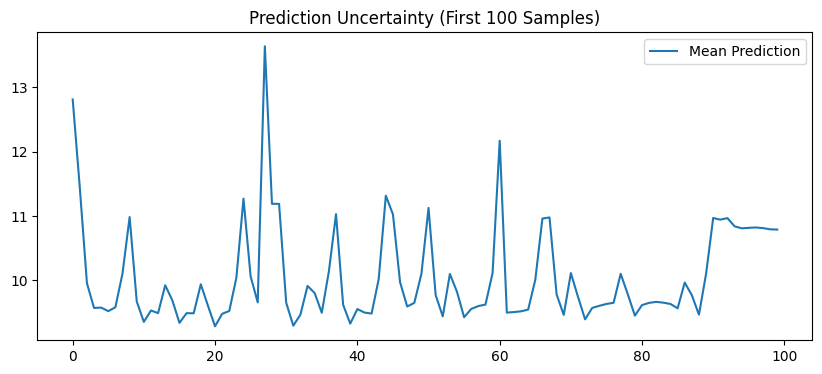

In [ ]:
graph_data_clean = torch.load("/content/drive/MyDrive/train_graph_data_sparse.pt", weights_only=False)
graph_data_noisy = torch.load("/content/drive/MyDrive/train1_graph_data_sparse.pt", weights_only=False)


# GNN ANALYSIS
# 1. Base Evaluation Metrics
analyze_gnn_batch(model, graph_data_clean, label="GNN Clean")

# 2. Uncertainty Estimation with Ensembles
ensemble_preds_clean = gnn_ensemble(model, graph_data_clean, n=10)

# 3. Uncertainty Plot
gnn_uncertainty_plot(ensemble_preds_clean)



📊 GNN Clean Evaluation Metrics:
MAE: 1.1057
MSE: 2.4414
R2 Score: 0.2153


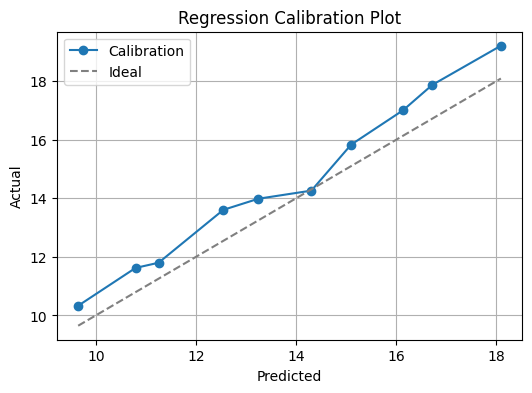

Running OOD Test without Noise...

📊 OOD Test Evaluation Metrics:


/usr/local/lib/python3.11/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


MAE: 1.1475
MSE: 2.5059
R2 Score: 0.1945


(array([13.22,  9.82,  9.95, ..., 12.23,  9.83,  8.76], dtype=float32),
 array([12.63174 , 11.251488, 10.612319, ...,  9.48578 ,  9.648095,
        10.168799], dtype=float32))

In [ ]:
y_true_clean, y_pred_clean = analyze_gnn_batch(model, graph_data_clean, label="GNN Clean")


regression_calibration_plot(y_true_clean, np.mean(ensemble_preds_clean, axis=0))

gnn_ood_test(model, graph_data_clean)

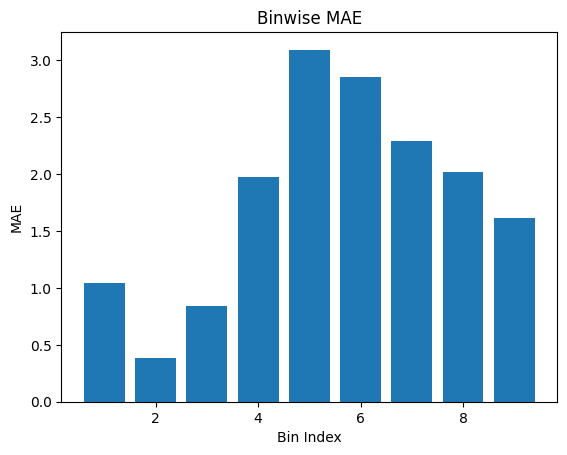

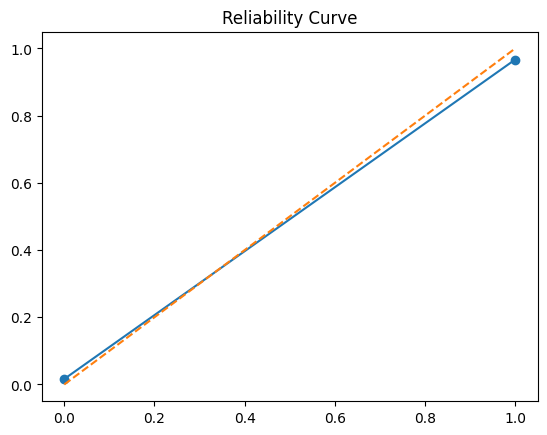

In [ ]:
binwise_error_analysis(y_true_clean, y_pred_clean)
y_true_binary = (y_true_clean> 15).astype(int)
y_pred_binary = (y_pred_clean > 15).astype(int)
plot_reliability(y_true_binary, y_pred_binary)



In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import seaborn as sns
import gc
from torch_geometric.nn import GATConv

from torch_geometric.loader import NeighborLoader
from torch_geometric.data import Data

df_clean = pd.read_csv("/content/drive/MyDrive/train3_denoised_fixed_corrected.csv")
df_noisy = pd.read_csv("/content/drive/MyDrive/train1_outlierrem.csv")

features = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "haversine_distance", "passenger_count"]
target = "fare_amount"

X_scaled_clean = df_clean[features].values
y_scaled_clean = df_clean[[target]].values.flatten()

X_scaled_noisy = df_noisy[features].values
y_scaled_noisy = df_noisy[[target]].values.flatten()

class TaxiDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

batch_size = 1024
train_size = int(0.8 * len(X_scaled_clean))
train_loader_clean = DataLoader(TaxiDataset(X_scaled_clean[:train_size], y_scaled_clean[:train_size]), batch_size=batch_size)
test_loader_clean = DataLoader(TaxiDataset(X_scaled_clean[train_size:], y_scaled_clean[train_size:]), batch_size=batch_size)

train_loader_noisy = DataLoader(TaxiDataset(X_scaled_noisy[:train_size], y_scaled_noisy[:train_size]), batch_size=batch_size)
test_loader_noisy = DataLoader(TaxiDataset(X_scaled_noisy[train_size:], y_scaled_noisy[train_size:]), batch_size=batch_size)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class GAT(torch.nn.Module):
    def __init__(self, input_dim):
        super(GAT, self).__init__()
        self.gat1 = GATConv(input_dim, 32, heads=4, concat=True, dropout=0.2)
        self.gat2 = GATConv(32 * 4, 16, heads=2, concat=True, dropout=0.2)
        self.gat3 = GATConv(16 * 2, 1, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        x = F.elu(x)
        x = self.gat3(x, edge_index)
        return x.squeeze()

gat_model_clean = GAT(input_dim=6)
gat_model_clean.load_state_dict(torch.load("/content/drive/MyDrive/gat_model_optimized.pth", map_location=device), strict=False)
gat_model_clean.to(device)
gat_model_clean.eval()

gat_model_noisy = GAT(input_dim=6)
gat_model_noisy.load_state_dict(torch.load("/content/drive/MyDrive/gat1_model_optimized.pth", map_location=device), strict=False)
gat_model_noisy.to(device)
gat_model_noisy.eval()



GAT(
  (gat1): GATConv(6, 32, heads=4)
  (gat2): GATConv(128, 16, heads=2)
  (gat3): GATConv(32, 1, heads=1)
)

In [ ]:
def analyze_gnn_batch(model1, graph_data, label="GNN", batch_size=1024):
    """
    Analyzes GNN batch and calculates evaluation metrics (MAE, MSE, R2 Score).
    """
    print(f"\n {label} Evaluation Metrics:")
    model1.eval()
    preds, targets = [], []
    loader1 = NeighborLoader(graph_data, input_nodes=None, num_neighbors=[10, 10], batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for batch in loader1:
            batch = batch.to(device)
            out = model1(batch)
            preds.append(out.squeeze().cpu())
            targets.append(batch.y.cpu())

    y_true = torch.cat(targets).numpy()
    y_pred = torch.cat(preds).numpy()

    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")

    torch.cuda.empty_cache(); gc.collect()
    return y_true, y_pred

def gnn_ensemble(model1, graph_data, n=3, batch_size=1024):
    """
    Performs ensemble evaluation by running the model multiple times and averaging predictions.
    """
    model1.eval()
    ensemble_preds = []

    for _ in range(n):
        preds = []
        loader1 = NeighborLoader(graph_data, input_nodes=None, num_neighbors=[10, 10], batch_size=batch_size)

        with torch.no_grad():
            for batch in loader1:
                batch = batch.to(device)
                out = model1(batch).squeeze().cpu().numpy()
                preds.extend(out)

        ensemble_preds.append(preds)
        torch.cuda.empty_cache(); gc.collect()

    return np.array(ensemble_preds)

def gnn_uncertainty_plot(predictions):
    """
    Plots uncertainty (mean ± standard deviation) for predictions.
    """
    mean_preds = predictions.mean(axis=0)
    std_preds = predictions.std(axis=0)

    plt.figure(figsize=(10, 4))
    plt.plot(mean_preds[:100], label="Mean Prediction")
    plt.fill_between(range(100), mean_preds[:100] - std_preds[:100], mean_preds[:100] + std_preds[:100], alpha=0.3)
    plt.title("Prediction Uncertainty (First 100 Samples)")
    plt.legend()
    plt.show()

def regression_calibration_plot(y_true, y_pred, n_bins=10):
    """
    Plots a calibration plot comparing predicted vs actual values.
    """
    bins = np.linspace(np.min(y_pred), np.max(y_pred), n_bins + 1)
    bin_ids = np.digitize(y_pred, bins) - 1

    bin_means_pred = []
    bin_means_true = []

    for i in range(n_bins):
        mask = bin_ids == i
        if np.any(mask):
            bin_means_pred.append(np.mean(y_pred[mask]))
            bin_means_true.append(np.mean(y_true[mask]))

    plt.figure(figsize=(6, 4))
    plt.plot(bin_means_pred, bin_means_true, marker='o', label='Calibration')
    plt.plot([min(bin_means_pred), max(bin_means_pred)],
             [min(bin_means_pred), max(bin_means_pred)], linestyle='--', color='gray', label='Ideal')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Regression Calibration Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

def gnn_ood_test(model1, graph_data):
    """
    Tests the model on out-of-distribution (OOD) data by adding noise to the input features.
    """
    print("Running OOD Test with Noise...")
    noise = torch.randn_like(graph_data.x) * 0.1
    ood_data = Data(x=graph_data.x + noise, edge_index=graph_data.edge_index, y=graph_data.y)
    return analyze_gnn_batch(model1, ood_data, label="OOD Test")

def binwise_error_analysis(y_true, y_pred):
    """
    Analyzes errors bin-wise and plots the MAE for each bin.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    bins = np.linspace(min(y_true), max(y_true), 10)
    indices = np.digitize(y_true, bins, right=True)
    bin_errors = []

    for i in range(1, len(bins)):
        mask = (indices == i)
        if np.any(mask):
            bin_errors.append(mean_absolute_error(y_true[mask], y_pred[mask]))
        else:
            bin_errors.append(0.0)

    plt.bar(range(1, len(bins)), bin_errors)
    plt.title("Binwise MAE")
    plt.xlabel("Bin Index")
    plt.ylabel("MAE")
    plt.show()

def plot_reliability(y_true, y_pred):
    """
    Plots the reliability curve for predicted vs actual values.
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', label='Reliability')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("Reliability Curve")
    plt.show()

print("Optimized GNN evaluation tools loaded.")

Optimized GNN evaluation tools loaded.


In [ ]:
!pip install torch-geometric
!pip install torch-scatter
!pip install torch-sparse
!pip install torch-geometric



In [ ]:
!pip show torch
!pip install torch-geometric==2.1.0


Name: torch
Version: 2.6.0+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu11, nvidia-cuda-cupti-cu11, nvidia-cuda-nvrtc-cu11, nvidia-cuda-runtime-cu11, nvidia-cudnn-cu11, nvidia-cufft-cu11, nvidia-curand-cu11, nvidia-cusolver-cu11, nvidia-cusparse-cu11, nvidia-nccl-cu11, nvidia-nvtx-cu11, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.5/467.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: Missing ninja templates
  Created wheel for torch-geometric: filename=torch_geometric-2.1.0-py3-none-any.whl size=687142 sha256=9b507fdf3a75bf2655331fa083c993d9e3386ed838396

In [ ]:
!pip install torch


📊 GNN Noisy Evaluation Metrics:
MAE: 2.5036
MSE: 11.4375
R2 Score: -1.1237


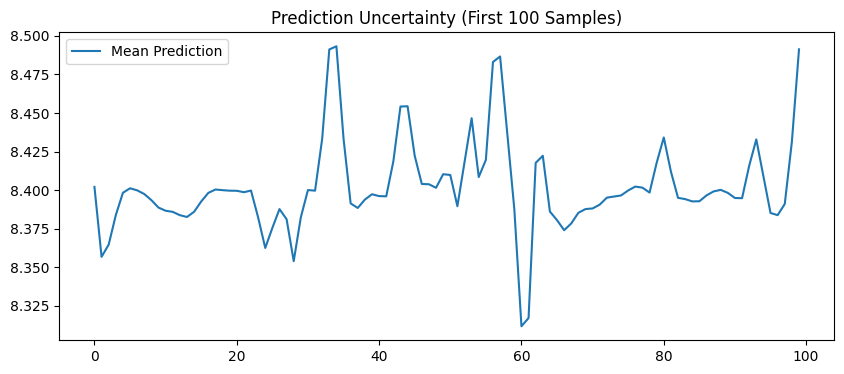

In [ ]:
import torch
graph_data_clean = torch.load("/content/drive/MyDrive/train_graph_data_sparse.pt", weights_only=False)
graph_data_noisy = torch.load("/content/drive/MyDrive/train1_graph_data_sparse.pt", weights_only=False)


y_true_clean, y_pred_clean = analyze_gnn_batch(gat_model_noisy, graph_data_noisy, label="GNN Noisy")


ensemble_preds_noisy = gnn_ensemble(gat_model_noisy, graph_data_noisy, n=10)


gnn_uncertainty_plot(ensemble_preds_noisy)

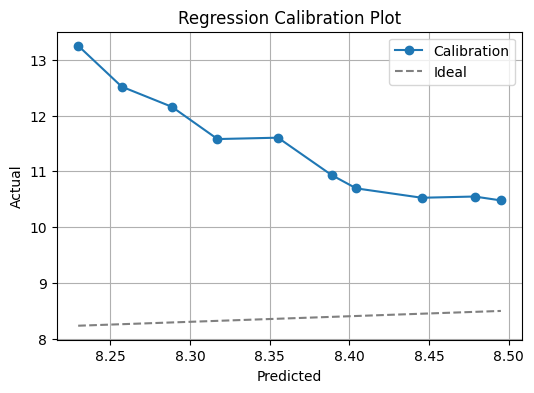

Running OOD Test with Noise...

📊 OOD Test Evaluation Metrics:
MAE: 2.5036
MSE: 11.4374
R2 Score: -1.1237


(array([14.853582,  9.09027 , 10.119432, ..., 10.016517,  8.472772,
        12.589424], dtype=float32),
 array([8.377058, 8.358856, 8.372304, ..., 8.394611, 8.283728, 8.208765],
       dtype=float32))

In [ ]:
regression_calibration_plot(y_true_clean, np.mean(ensemble_preds_noisy, axis=0))


gnn_ood_test(gat_model_noisy, graph_data_noisy)

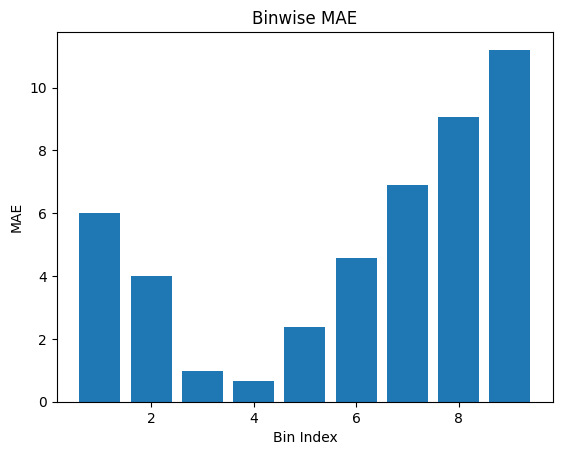

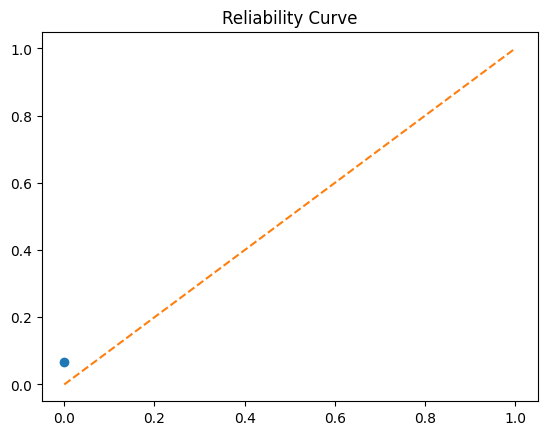

In [ ]:
binwise_error_analysis(y_true_clean, y_pred_clean)
y_true_binary = (y_true_clean> 15).astype(int)
y_pred_binary = (y_pred_clean > 15).astype(int)
plot_reliability(y_true_binary, y_pred_binary)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


noisy_file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
denoised_file_path = "/content/drive/MyDrive/train3_denoised_fixed_corrected.csv"


df_noisy = pd.read_csv(noisy_file_path)
df_denoised = pd.read_csv(denoised_file_path)


features = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "haversine_distance", "passenger_count"]
target = "fare_amount"


X_noisy = df_noisy[features].values
y_noisy = df_noisy[target].values

X_denoised = df_denoised[features].values
y_denoised = df_denoised[target].values


X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised = train_test_split(X_denoised, y_denoised, test_size=0.2, random_state=42)


scaler_noisy = StandardScaler()
X_train_noisy_scaled = scaler_noisy.fit_transform(X_train_noisy)
X_test_noisy_scaled = scaler_noisy.transform(X_test_noisy)

scaler_denoised = StandardScaler()
X_train_denoised_scaled = scaler_denoised.fit_transform(X_train_denoised)
X_test_denoised_scaled = scaler_denoised.transform(X_test_denoised)

print("Data loading and preprocessing complete!")


Data loading and preprocessing complete!


XGBoost Training and Evaluation on Noisy Data

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


xgb_model_noisy = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)


xgb_model_noisy.fit(X_train_noisy_scaled, y_train_noisy)


y_pred_noisy = xgb_model_noisy.predict(X_test_noisy_scaled)


mae_noisy = mean_absolute_error(y_test_noisy, y_pred_noisy)
mse_noisy = mean_squared_error(y_test_noisy, y_pred_noisy)
rmse_noisy = np.sqrt(mse_noisy)
r2_noisy = r2_score(y_test_noisy, y_pred_noisy)

print("XGBoost on Noisy Data:")
print(f"MAE: {mae_noisy:.4f}")
print(f"RMSE: {rmse_noisy:.4f}")
print(f"R2 Score: {r2_noisy:.4f}")


tolerance = 0.1
accuracy_noisy = np.mean(np.abs((y_pred_noisy - y_test_noisy) / y_test_noisy) < tolerance)
print(f"Accuracy (within 10% tolerance): {accuracy_noisy*100:.2f}%")


XGBoost on Noisy Data:
MAE: 0.8203
RMSE: 1.2003
R2 Score: 0.7326
Accuracy (within 10% tolerance): 75.87%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from sklearn.calibration import calibration_curve

def analyze_xgb(model, X, y, label="XGBoost"):
    """
    Print MAE, MSE, R² and return (y_true, y_pred)
    """
    print(f"\n {label} Evaluation Metrics:")
    y_pred = model.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    r2  = r2_score(y, y_pred)
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    return np.array(y), np.array(y_pred)

def xgb_ensemble_noise(model, X, n=5, noise_level=0.1):
    """
    Build an ensemble by adding Gaussian noise to X, returning shape (n, N)
    """
    ensemble = []
    for _ in range(n):
        X_noisy = X + np.random.randn(*X.shape) * noise_level
        ensemble.append(model.predict(X_noisy))
    return np.stack(ensemble)

def xgb_uncertainty_plot(preds_ensemble):
    """
    Plot mean ± std over first 100 samples of an ensemble array shape (n, N)
    """
    mean_preds = preds_ensemble.mean(axis=0)
    std_preds  = preds_ensemble.std(axis=0)
    plt.figure(figsize=(10,4))
    plt.plot(mean_preds[:100], label="Mean Prediction")
    plt.fill_between(
        np.arange(100),
        mean_preds[:100] - std_preds[:100],
        mean_preds[:100] + std_preds[:100],
        alpha=0.3
    )
    plt.title("Prediction Uncertainty (First 100 Samples)")
    plt.legend()
    plt.show()

def regression_calibration_plot(y_true, y_pred, n_bins=10):
    """
    Bin predictions and plot mean predicted vs. mean actual
    """
    bins = np.linspace(y_pred.min(), y_pred.max(), n_bins+1)
    ids  = np.digitize(y_pred, bins) - 1

    bin_means_pred = []
    bin_means_true = []
    for i in range(n_bins):
        mask = ids == i
        if mask.any():
            bin_means_pred.append(y_pred[mask].mean())
            bin_means_true.append(y_true[mask].mean())

    plt.figure(figsize=(6,4))
    plt.plot(bin_means_pred, bin_means_true, 'o-', label="Calibration")
    mn, mx = min(bin_means_pred), max(bin_means_pred)
    plt.plot([mn,mx],[mn,mx],'--', color='gray', label="Ideal")
    plt.xlabel("Mean Predicted")
    plt.ylabel("Mean Actual")
    plt.title("Regression Calibration Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

def xgb_ood_test(model, X, y, noise_level=0.1):
    """
    Add Gaussian noise to X and evaluate.
    Returns (y_true, y_pred) after printing metrics.
    """
    print("\n OOD Test with Noise")
    X_noisy = X + np.random.randn(*X.shape) * noise_level
    return analyze_xgb(model, X_noisy, y, label="OOD Test")

def binwise_error_analysis(y_true, y_pred, bins=10):
    """
    Plot MAE for each bin of y_true.
    """
    bins = np.linspace(y_true.min(), y_true.max(), bins+1)
    ids  = np.digitize(y_true, bins, right=True)
    errs = []
    for i in range(1, len(bins)):
        mask = ids==i
        errs.append(mean_absolute_error(y_true[mask], y_pred[mask]) if mask.any() else 0.0)
    plt.bar(range(1,len(errs)+1), errs)
    plt.xlabel("Bin Index")
    plt.ylabel("MAE")
    plt.title("Binwise MAE")
    plt.show()

def plot_reliability(y_true, y_pred, n_bins=10):
    """
    Reliability curve: fraction true vs. predicted in each bin.
    """
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=n_bins)
    plt.plot(prob_pred, prob_true, 'o-', label="Reliability")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel("Predicted frac")
    plt.ylabel("True frac")
    plt.title("Reliability Curve")
    plt.legend()
    plt.show()

print(" XGBoost evaluation tools loaded.")


 XGBoost evaluation tools loaded.



📊 XGB Noisy Evaluation Metrics:
MAE: 0.8203
MSE: 1.4407
R2 Score: 0.7326


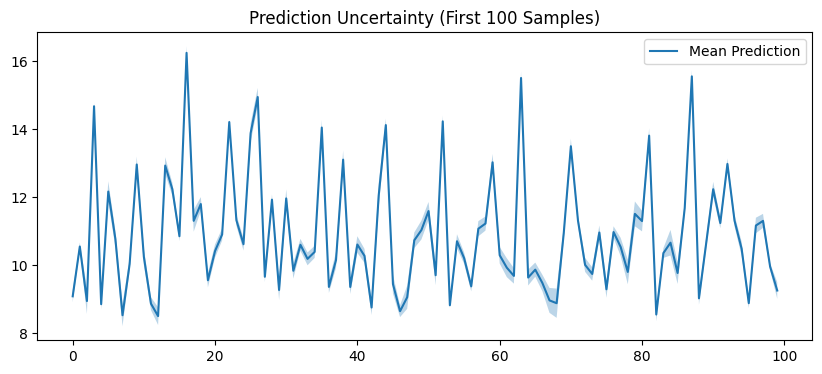

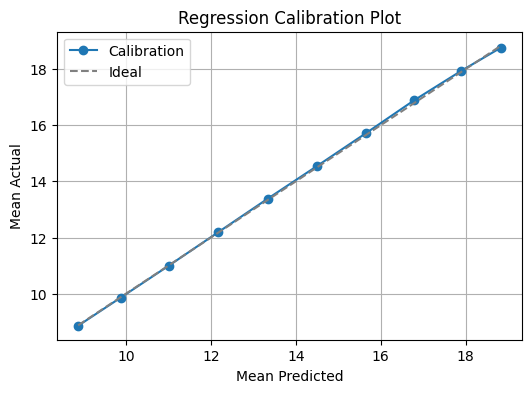

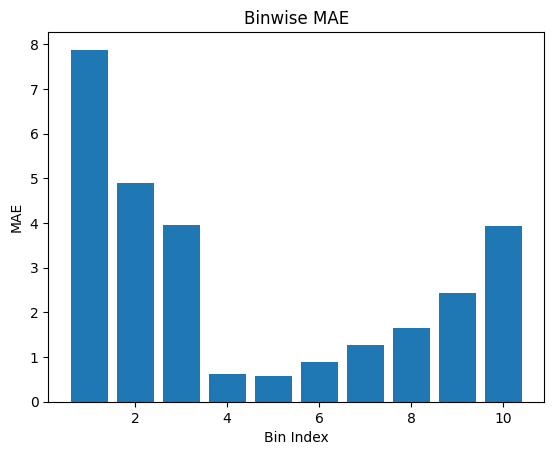


 OOD Test with Noise

📊 OOD Test Evaluation Metrics:
MAE: 0.8504
MSE: 1.5116
R2 Score: 0.7195


In [ ]:
y_true_noisy, y_pred_noisy = analyze_xgb(xgb_model_noisy, X_test_noisy_scaled, y_test_noisy, label="XGB Noisy")

ensemble_preds = xgb_ensemble_noise(xgb_model_noisy, X_test_noisy_scaled, n=10, noise_level=0.1)
xgb_uncertainty_plot(ensemble_preds)

regression_calibration_plot(y_true_noisy, y_pred_noisy)
binwise_error_analysis(y_true_noisy, y_pred_noisy)

# plot_reliability(y_true_noisy, y_pred_noisy)

y_true_ood, y_pred_ood = xgb_ood_test(xgb_model_noisy, X_test_noisy_scaled, y_test_noisy, noise_level=0.1)


In [ ]:
xgb_model_denoised = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)


xgb_model_denoised.fit(X_train_denoised_scaled, y_train_denoised)


y_pred_denoised = xgb_model_denoised.predict(X_test_denoised_scaled)


mae_denoised = mean_absolute_error(y_test_denoised, y_pred_denoised)
mse_denoised = mean_squared_error(y_test_denoised, y_pred_denoised)
rmse_denoised = np.sqrt(mse_denoised)
r2_denoised = r2_score(y_test_denoised, y_pred_denoised)

print("XGBoost on Denoised Data:")
print(f"MAE: {mae_denoised:.4f}")
print(f"RMSE: {rmse_denoised:.4f}")
print(f"R2 Score: {r2_denoised:.4f}")

tolerance = 0.1
accuracy_denoised = np.mean(np.abs((y_pred_denoised - y_test_denoised) / y_test_denoised) < tolerance)
print(f"Accuracy (within 10% tolerance): {accuracy_denoised*100:.2f}%")


XGBoost on Denoised Data:
MAE: 0.1040
RMSE: 0.1672
R2 Score: 0.9910
Accuracy (within 10% tolerance): 99.70%



📊 XGB Denoised Evaluation Metrics:
MAE: 0.1040
MSE: 0.0279
R2 Score: 0.9910


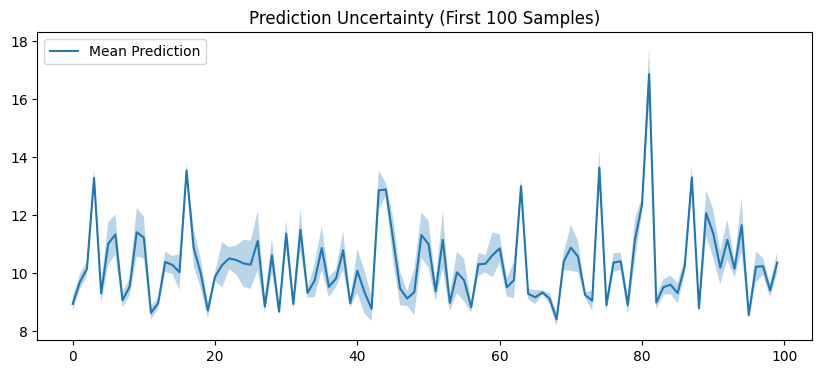

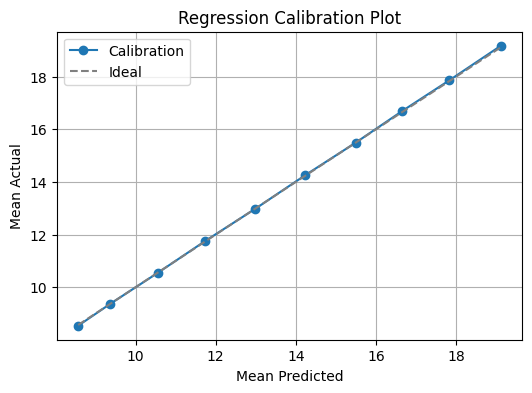

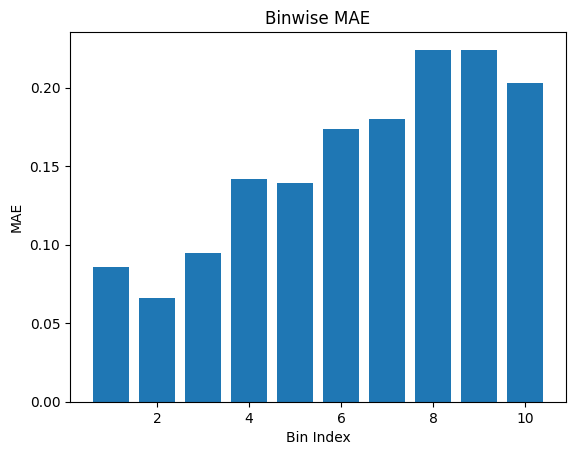


 OOD Test with Noise

📊 OOD Test Evaluation Metrics:
MAE: 0.5921
MSE: 0.7006
R2 Score: 0.7748


In [ ]:
y_true_den, y_pred_den = analyze_xgb(
    xgb_model_denoised,
    X_test_denoised_scaled,
    y_test_denoised,
    label="XGB Denoised"
)

ensemble_preds_den = xgb_ensemble_noise(
    xgb_model_denoised,
    X_test_denoised_scaled,
    n=10,
    noise_level=0.1
)
xgb_uncertainty_plot(ensemble_preds_den)

regression_calibration_plot(y_true_den, y_pred_den)
binwise_error_analysis(y_true_den, y_pred_den)

# 4) Reliability curve
# plot_reliability(y_true_den, y_pred_den)

y_true_ood_den, y_pred_ood_den = xgb_ood_test(
    xgb_model_denoised,
    X_test_denoised_scaled,
    y_test_denoised,
    noise_level=0.1
)


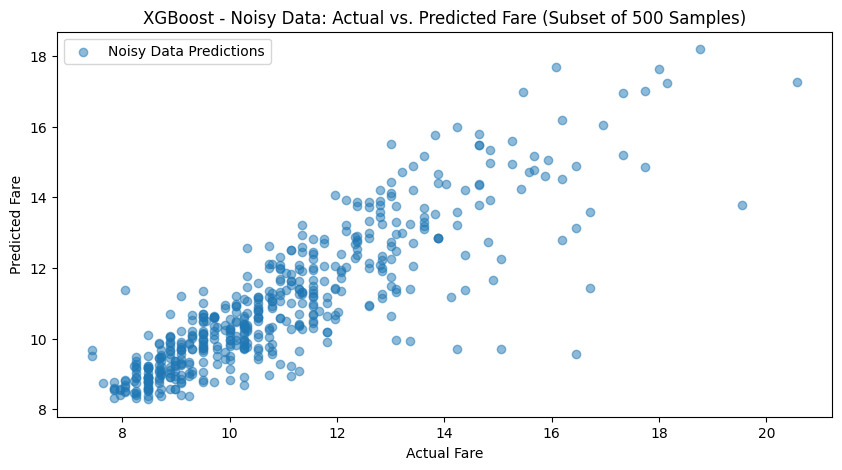

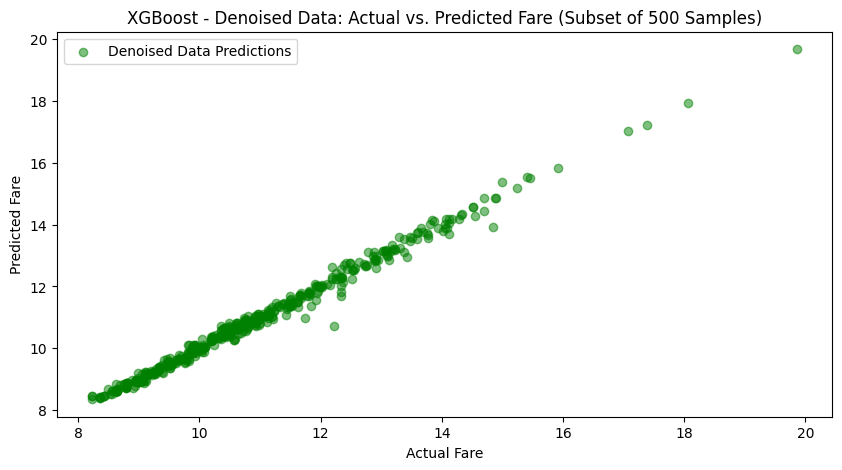

Comparative Analysis Metrics:
    Dataset       MAE      RMSE  R2 Score
0     Noisy  0.820250  1.200273  0.732632
1  Denoised  0.104046  0.167178  0.991017


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


subset_size = 500


plt.figure(figsize=(10, 5))
plt.scatter(y_test_noisy[:subset_size], y_pred_noisy[:subset_size], alpha=0.5, label='Noisy Data Predictions')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title(f"XGBoost - Noisy Data: Actual vs. Predicted Fare (Subset of {subset_size} Samples)")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test_denoised[:subset_size], y_pred_denoised[:subset_size], alpha=0.5, color='green', label='Denoised Data Predictions')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title(f"XGBoost - Denoised Data: Actual vs. Predicted Fare (Subset of {subset_size} Samples)")
plt.legend()
plt.show()

metrics_data = {
    'Dataset': ['Noisy', 'Denoised'],
    'MAE': [mae_noisy, mae_denoised],
    'RMSE': [rmse_noisy, rmse_denoised],
    'R2 Score': [r2_noisy, r2_denoised]
}

metrics_df = pd.DataFrame(metrics_data)
print("Comparative Analysis Metrics:")
print(metrics_df)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


noisy_file_path = "/content/drive/MyDrive/train1_outlierrem.csv"
denoised_file_path = "/content/drive/MyDrive/train3_denoised_fixed_corrected.csv"


df_noisy = pd.read_csv(noisy_file_path)
df_denoised = pd.read_csv(denoised_file_path)


features = ["pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "haversine_distance", "passenger_count"]
target = "fare_amount"

X_noisy = df_noisy[features].values
y_noisy = df_noisy[target].values

X_denoised = df_denoised[features].values
y_denoised = df_denoised[target].values

X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy, y_noisy, test_size=0.2, random_state=42)
X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised = train_test_split(X_denoised, y_denoised, test_size=0.2, random_state=42)

scaler_noisy = StandardScaler()
X_train_noisy_scaled = scaler_noisy.fit_transform(X_train_noisy)
X_test_noisy_scaled = scaler_noisy.transform(X_test_noisy)

scaler_denoised = StandardScaler()
X_train_denoised_scaled = scaler_denoised.fit_transform(X_train_denoised)
X_test_denoised_scaled = scaler_denoised.transform(X_test_denoised)

print("Data loading and preprocessing complete!")


Data loading and preprocessing complete!


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def create_timesnet_dataset(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 10

X_train_noisy_seq, y_train_noisy_seq = create_timesnet_dataset(X_train_noisy_scaled, y_train_noisy, seq_len)
X_test_noisy_seq, y_test_noisy_seq = create_timesnet_dataset(X_test_noisy_scaled, y_test_noisy, seq_len)

X_train_denoised_seq, y_train_denoised_seq = create_timesnet_dataset(X_train_denoised_scaled, y_train_denoised, seq_len)
X_test_denoised_seq, y_test_denoised_seq = create_timesnet_dataset(X_test_denoised_scaled, y_test_denoised, seq_len)

import torch
from torch.utils.data import Dataset

class TimesNetTaxiDataset(Dataset):
    def __init__(self, X_seq, y_seq):
        self.X = X_seq
        self.y = y_seq
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):

        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

train_dataset_noisy = TimesNetTaxiDataset(X_train_noisy_seq, y_train_noisy_seq)
test_dataset_noisy  = TimesNetTaxiDataset(X_test_noisy_seq, y_test_noisy_seq)

train_dataset_denoised = TimesNetTaxiDataset(X_train_denoised_seq, y_train_denoised_seq)
test_dataset_denoised  = TimesNetTaxiDataset(X_test_denoised_seq, y_test_denoised_seq)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TimesBlock(nn.Module):

    def __init__(self, embed_dim, seq_len, period, conv_out_channels=None, kernel_size=(3,3), dropout=0.1):
        super(TimesBlock, self).__init__()
        self.period = period
        self.seq_len = seq_len
        self.T_div = seq_len // period
        if conv_out_channels is None:
            conv_out_channels = embed_dim

        self.conv2d = nn.Conv2d(in_channels=embed_dim, out_channels=conv_out_channels,
                                kernel_size=kernel_size,
                                padding=(kernel_size[0]//2, kernel_size[1]//2))
        self.dropout = nn.Dropout(dropout)

        self.fc = nn.Linear(conv_out_channels * self.T_div * period, embed_dim)

    def forward(self, x):

        B, T, C = x.size()
        p = self.period
        T_div = T // p
        x = x[:, :T_div*p, :]
        x_2d = x.view(B, T_div, p, C).permute(0, 3, 1, 2)
        x_conv = self.conv2d(x_2d)
        x_conv = F.relu(x_conv)
        x_conv = self.dropout(x_conv)
        x_flat = x_conv.view(B, -1)
        out = self.fc(x_flat)
        return out

class TimesNet(nn.Module):

    def __init__(self, input_size, seq_len, embed_dim=64, period=5, num_blocks=2, dropout=0.1):
        super(TimesNet, self).__init__()
        self.seq_len = seq_len
        self.embedding = nn.Linear(input_size, embed_dim)
        self.blocks = nn.ModuleList([
            TimesBlock(embed_dim, seq_len, period, conv_out_channels=embed_dim, kernel_size=(3,3), dropout=dropout)
            for _ in range(num_blocks)
        ])
        self.regressor = nn.Linear(embed_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        block_outputs = []
        for block in self.blocks:
            block_out = block(x)
            block_outputs.append(block_out)

        x_out = torch.stack(block_outputs, dim=1).mean(dim=1)
        output = self.regressor(x_out)
        return output.squeeze()


In [ ]:
class TimesBlock(nn.Module):

    def __init__(self, embed_dim, seq_len, period, conv_out_channels=None, kernel_size=(3,3), dropout=0.1):
        super(TimesBlock, self).__init__()
        self.period = period
        self.seq_len = seq_len
        self.T_div = seq_len // period
        if conv_out_channels is None:
            conv_out_channels = embed_dim

        self.conv2d = nn.Conv2d(in_channels=embed_dim, out_channels=conv_out_channels,
                                kernel_size=kernel_size,
                                padding=(kernel_size[0]//2, kernel_size[1]//2))
        self.dropout = nn.Dropout(dropout)

        self.fc = nn.Linear(conv_out_channels * self.T_div * period, embed_dim)

    def forward(self, x):

        B, T, C = x.size()
        p = self.period
        T_div = T // p
        x = x[:, :T_div * p, :]
        x_2d = x.view(B, T_div, p, C).permute(0, 3, 1, 2)
        x_conv = self.conv2d(x_2d)
        x_conv = F.relu(x_conv)
        x_conv = self.dropout(x_conv)
        x_flat = x_conv.reshape(B, -1)
        out = self.fc(x_flat)
        return out


In [ ]:
from torch.utils.data import DataLoader
import torch.optim as optim


batch_size = 128
train_loader_noisy = DataLoader(train_dataset_noisy, batch_size=batch_size, shuffle=True)
test_loader_noisy  = DataLoader(test_dataset_noisy, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train_noisy_seq.shape[2]
embed_dim = 64
period = 5
num_blocks = 2
model_timesnet_noisy = TimesNet(input_size=input_size, seq_len=seq_len, embed_dim=embed_dim,
                                period=period, num_blocks=num_blocks, dropout=0.1).to(device)

optimizer_noisy = optim.Adam(model_timesnet_noisy.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.L1Loss()

num_epochs = 20
best_val_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(num_epochs):
    model_timesnet_noisy.train()
    train_losses = []
    for X_batch, y_batch in train_loader_noisy:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer_noisy.zero_grad()
        outputs = model_timesnet_noisy(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer_noisy.step()
        train_losses.append(loss.item())
    train_loss = np.mean(train_losses)

    model_timesnet_noisy.eval()
    val_losses = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader_noisy:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model_timesnet_noisy(X_batch)
            loss = criterion(outputs, y_batch)
            val_losses.append(loss.item())
    val_loss = np.mean(val_losses)

    print(f"[Noisy] Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model_timesnet_noisy.state_dict(), "/content/drive/MyDrive/timesnet_noisy_best.pth")
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered on noisy data.")
            break

print("Training of TimesNet on Noisy Data completed and model saved!")


[Noisy] Epoch 1, Train Loss: 1.7363, Val Loss: 1.7289


In [ ]:
from torch.utils.data import DataLoader
batch_size = 128
test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

batch_size = 128
test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=batch_size, shuffle=False)

model_timesnet_noisy.eval()

preds_noisy, actuals_noisy = [], []
with torch.no_grad():
    for Xb, yb in test_loader_noisy:
        Xb, yb = Xb.to(device), yb.to(device)
        out = model_timesnet_noisy(Xb)
        preds_noisy.extend(out.cpu().numpy())
        actuals_noisy.extend(yb.cpu().numpy())

mae_noisy  = mean_absolute_error(actuals_noisy, preds_noisy)
rmse_noisy = np.sqrt(mean_squared_error(actuals_noisy, preds_noisy))
r2_noisy   = r2_score(actuals_noisy, preds_noisy)
accuracy_noisy = np.mean(
    np.abs((np.array(preds_noisy) - np.array(actuals_noisy)) / np.array(actuals_noisy)) < 0.1
)

print("\nTimesNet on Noisy Data:")
print(f" MAE:     {mae_noisy:.4f}")
print(f" RMSE:    {rmse_noisy:.4f}")
print(f" R²:      {r2_noisy:.4f}")
print(f" Accuracy (±10%): {accuracy_noisy*100:.2f}%")



TimesNet on Noisy Data:
 MAE:     1.7347
 RMSE:    2.3599
 R²:      -0.0336
 Accuracy (±10%): 38.23%


In [ ]:
from torch.utils.data import DataLoader
import torch.optim as optim
import numpy as np

batch_size = 128
train_loader_denoised = DataLoader(train_dataset_denoised, batch_size=batch_size, shuffle=True)
test_loader_denoised  = DataLoader(test_dataset_denoised,  batch_size=batch_size, shuffle=False)

model_timesnet_denoised = TimesNet(
    input_size=input_size,
    seq_len=seq_len,
    embed_dim=embed_dim,
    period=period,
    num_blocks=num_blocks,
    dropout=0.1
).to(device)

optimizer_denoised = optim.Adam(model_timesnet_denoised.parameters(), lr=0.001, weight_decay=1e-4)
criterion = nn.L1Loss()
num_epochs = 10
best_val_loss = float('inf')
patience = 5
patience_counter = 0

for epoch in range(1, num_epochs+1):

    model_timesnet_denoised.train()
    train_losses = []
    for Xb, yb in train_loader_denoised:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer_denoised.zero_grad()
        out = model_timesnet_denoised(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer_denoised.step()
        train_losses.append(loss.item())
    train_loss = np.mean(train_losses)

    model_timesnet_denoised.eval()
    val_losses = []
    with torch.no_grad():
        for Xb, yb in test_loader_denoised:
            Xb, yb = Xb.to(device), yb.to(device)
            out = model_timesnet_denoised(Xb)
            val_losses.append(criterion(out, yb).item())
    val_loss = np.mean(val_losses)

    print(f"[Denoised] Epoch {epoch}/{num_epochs}  Train: {train_loss:.4f}  Val: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        torch.save(model_timesnet_denoised.state_dict(), "/content/drive/MyDrive/timesnet_denoised_best.pth")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered on denoised data.")
            break

print("✅ Training of TimesNet on Denoised Data complete and model saved!")


[Denoised] Epoch 1/10  Train: 1.3611  Val: 1.3549


KeyboardInterrupt: 

In [ ]:
from torch.utils.data import DataLoader
test_dataset_denoised = TimesNetTaxiDataset(X_test_denoised_seq, y_test_denoised_seq)
batch_size = 128
test_loader_denoised = DataLoader(test_dataset_denoised, batch_size=batch_size, shuffle=False)


In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
batch_size = 128
test_loader_denoised = DataLoader(test_dataset_denoised, batch_size=batch_size, shuffle=False)
model_timesnet_denoised = TimesNet(
    input_size=input_size,
    seq_len=seq_len,
    embed_dim=embed_dim,
    period=period,
    num_blocks=num_blocks,
    dropout=0.1
).to(device)

model_timesnet_denoised.load_state_dict(
    torch.load("/content/drive/MyDrive/timesnet_denoised_best.pth")
)
model_timesnet_denoised.eval()
preds_den, actuals_den = [], []
with torch.no_grad():
    for Xb, yb in test_loader_denoised:
        Xb, yb = Xb.to(device), yb.to(device)
        out = model_timesnet_denoised(Xb)
        preds_den.extend(out.cpu().numpy())
        actuals_den.extend(yb.cpu().numpy())
mae_den   = mean_absolute_error(actuals_den, preds_den)
rmse_den  = np.sqrt(mean_squared_error(actuals_den, preds_den))
r2_den    = r2_score(actuals_den, preds_den)
accuracy_den = np.mean(
    np.abs((np.array(preds_den) - np.array(actuals_den)) / np.array(actuals_den)) < 0.1
)
print("\nTimesNet on Denoised Data:")
print(f" MAE:     {mae_den:.4f}")
print(f" RMSE:    {rmse_den:.4f}")
print(f" R²:      {r2_den:.4f}")
print(f" Accuracy (±10%): {accuracy_den*100:.2f}%")



TimesNet on Denoised Data:
 MAE:     1.3549
 RMSE:    1.8312
 R²:      -0.0779
 Accuracy (±10%): 48.43%


In [ ]:
def analyze_gnn_batch(model1, graph_data, label="GNN", batch_size=1024):
    print(f"\n {label} Evaluation Metrics:")
    model1.eval()
    preds, targets = [], []
    loader1 = NeighborLoader(graph_data, input_nodes=None, num_neighbors=[10, 10], batch_size=batch_size, shuffle=False)
    with torch.no_grad():
        for batch in loader1:
            batch = batch.to(device1)
            out = model1(batch)
            preds.append(out.squeeze().cpu())
            targets.append(batch.y.cpu())
    y_true = torch.cat(targets).numpy()
    y_pred = torch.cat(preds).numpy()
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    torch.cuda.empty_cache(); gc.collect()
    return y_true, y_pred

def gnn_ensemble(model1, graph_data, n=3, batch_size=1024):
    model1.eval()
    ensemble_preds = []
    for _ in range(n):
        preds = []
        loader1 = NeighborLoader(graph_data, input_nodes=None, num_neighbors=[10, 10], batch_size=batch_size)
        with torch.no_grad():
            for batch in loader1:
                batch = batch.to(device1)
                out = model1(batch).squeeze().cpu().numpy()
                preds.extend(out)
        ensemble_preds.append(preds)
        torch.cuda.empty_cache(); gc.collect()
    return np.array(ensemble_preds)

def gnn_uncertainty_plot(predictions):
    mean_preds = predictions.mean(axis=0)
    std_preds = predictions.std(axis=0)
    plt.figure(figsize=(10, 4))
    plt.plot(mean_preds[:100], label="Mean Prediction")
    plt.fill_between(range(100), mean_preds[:100] - std_preds[:100], mean_preds[:100] + std_preds[:100], alpha=0.3)
    plt.title("Prediction Uncertainty (First 100 Samples)")
    plt.legend()
    plt.show()

def regression_calibration_plot(y_true, y_pred, n_bins=10):
    bins = np.linspace(np.min(y_pred), np.max(y_pred), n_bins + 1)
    bin_ids = np.digitize(y_pred, bins) - 1

    bin_means_pred = []
    bin_means_true = []

    for i in range(n_bins):
        mask = bin_ids == i
        if np.any(mask):
            bin_means_pred.append(np.mean(y_pred[mask]))
            bin_means_true.append(np.mean(y_true[mask]))

    plt.figure(figsize=(6, 4))
    plt.plot(bin_means_pred, bin_means_true, marker='o', label='Calibration')
    plt.plot([min(bin_means_pred), max(bin_means_pred)],
             [min(bin_means_pred), max(bin_means_pred)], linestyle='--', color='gray', label='Ideal')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Regression Calibration Plot")
    plt.legend()
    plt.grid(True)
    plt.show()

def gnn_ood_test(model1, graph_data):
    print("Running OOD Test with Noise...")
    noise = torch.randn_like(graph_data.x) * 0.1
    ood_data = Data(x=graph_data.x + noise, edge_index=graph_data.edge_index, y=graph_data.y)
    return analyze_gnn_batch(model1, ood_data, label="OOD Test")

def binwise_error_analysis(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    bins = np.linspace(min(y_true), max(y_true), 10)
    indices = np.digitize(y_true, bins, right=True)
    bin_errors = []
    for i in range(1, len(bins)):
        mask = (indices == i)
        if np.any(mask):
            bin_errors.append(mean_absolute_error(y_true[mask], y_pred[mask]))
        else:
            bin_errors.append(0.0)
    plt.bar(range(1, len(bins)), bin_errors)
    plt.title("Binwise MAE")
    plt.xlabel("Bin Index")
    plt.ylabel("MAE")
    plt.show()

def plot_reliability(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label='Reliability')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title("Reliability Curve")
    plt.show()


print(" Optimized GNN evaluation tools loaded.")

 Optimized GNN evaluation tools loaded.



 TimesNet Noisy Evaluation Metrics:
 MAE:     1.7303
 MSE:     5.8835
 R2:      -0.0919

 TimesNet Denoised Evaluation Metrics:
 MAE:     1.3549
 MSE:     3.3534
 R2:      -0.0779

 Calibration Plot — Noisy Data


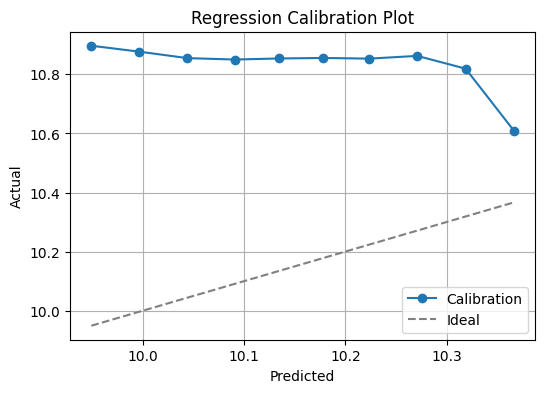


 Bin‑wise MAE — Noisy Data


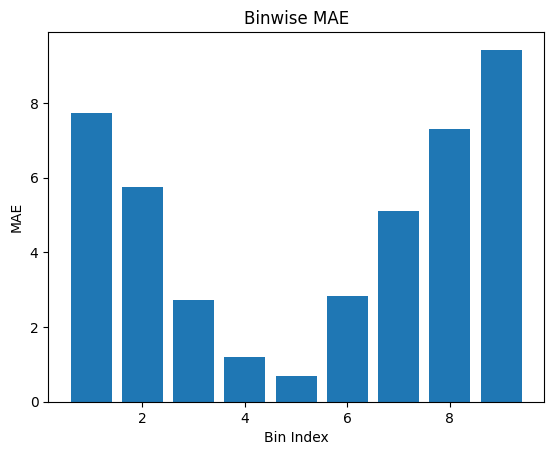


 Calibration Plot — Denoised Data


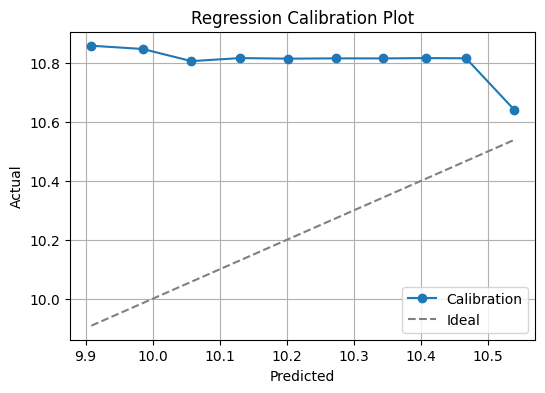


 Bin‑wise MAE — Denoised Data


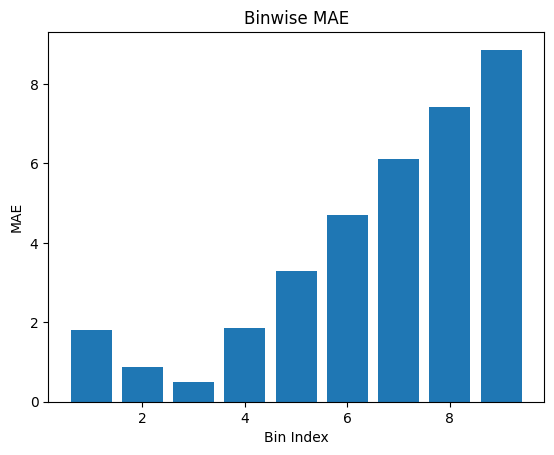

In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def analyze_model_batch(model, data_loader, label="Model"):
    print(f"\n {label} Evaluation Metrics:")
    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for Xb, yb in data_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            out = model(Xb)
            preds.append(out.cpu())
            targets.append(yb.cpu())
    y_true = torch.cat(targets).numpy()
    y_pred = torch.cat(preds).numpy()
    print(f" MAE:     {mean_absolute_error(y_true, y_pred):.4f}")
    print(f" MSE:     {mean_squared_error(y_true, y_pred):.4f}")
    print(f" R2:      {r2_score(y_true, y_pred):.4f}")
    return y_true, y_pred
batch_size = 128
test_loader_noisy    = DataLoader(test_dataset_noisy,    batch_size=batch_size, shuffle=False)
test_loader_denoised = DataLoader(test_dataset_denoised, batch_size=batch_size, shuffle=False)
model_timesnet_noisy.load_state_dict(
    torch.load("/content/drive/MyDrive/timesnet_noisy_best.pth", map_location=device)
)
y_true_noisy, y_pred_noisy = analyze_model_batch(model_timesnet_noisy, test_loader_noisy, label="TimesNet Noisy")
model_timesnet_denoised.load_state_dict(
    torch.load("/content/drive/MyDrive/timesnet_denoised_best.pth", map_location=device)
)
y_true_den, y_pred_den = analyze_model_batch(model_timesnet_denoised, test_loader_denoised, label="TimesNet Denoised")
print("\n Calibration Plot — Noisy Data")
regression_calibration_plot(y_true_noisy, y_pred_noisy)

print("\n Bin‑wise MAE — Noisy Data")
binwise_error_analysis(y_true_noisy, y_pred_noisy)

# print("\n Reliability Curve — Noisy Data")
# plot_reliability(y_true_noisy, y_pred_noisy)

print("\n Calibration Plot — Denoised Data")
regression_calibration_plot(y_true_den, y_pred_den)

print("\n Bin‑wise MAE — Denoised Data")
binwise_error_analysis(y_true_den, y_pred_den)

# print("\n Reliability Curve — Denoised Data")
# plot_reliability(y_true_den, y_pred_den)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def timesnet_ensemble(model, data_loader, n=5, noise_level=0.1):
    """
    Build an ensemble of n runs by injecting Gaussian noise into each input batch.
    Returns an array of shape (n, N_total) of predictions.
    """
    model.eval()
    all_runs = []
    with torch.no_grad():
        for run in range(n):
            run_preds = []
            for Xb, _ in data_loader:
                # add noise to Xb
                Xb_noisy = Xb + torch.randn_like(Xb) * noise_level
                out = model(Xb_noisy.to(device))
                run_preds.append(out.cpu())
            all_runs.append(torch.cat(run_preds).numpy())
    return np.stack(all_runs)

def timesnet_uncertainty_plot(ensemble_preds, title="Prediction Uncertainty"):
    """
    Plot mean ± 1 std over the first 100 samples of an ensemble_preds array.
    """
    mean_preds = ensemble_preds.mean(axis=0)
    std_preds  = ensemble_preds.std(axis=0)
    plt.figure(figsize=(10,4))
    plt.plot(mean_preds[:100], label="Mean Prediction")
    plt.fill_between(
        np.arange(100),
        mean_preds[:100] - std_preds[:100],
        mean_preds[:100] + std_preds[:100],
        alpha=0.3
    )
    plt.title(title + " (First 100 Samples)")
    plt.xlabel("Sample Index")
    plt.ylabel("Predicted Fare")
    plt.legend()
    plt.show()

def timesnet_ood_test(model, data_loader, noise_level=0.1, label="OOD Test"):
    """
    Evaluates the model on out‐of‐distribution (noisy) inputs.
    Prints MAE / MSE / R2 and returns (y_true, y_pred).
    """
    print(f"\n {label} Evaluation Metrics:")
    model.eval()
    preds, targets = [], []
    with torch.no_grad():
        for Xb, yb in data_loader:
            Xb_noisy = Xb + torch.randn_like(Xb) * noise_level
            out = model(Xb_noisy.to(device))
            preds.append(out.cpu())
            targets.append(yb)
    y_true = torch.cat(targets).numpy()
    y_pred = torch.cat(preds).numpy()
    print(f" MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f" MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f" R2:  {r2_score(y_true, y_pred):.4f}")
    return y_true, y_pred


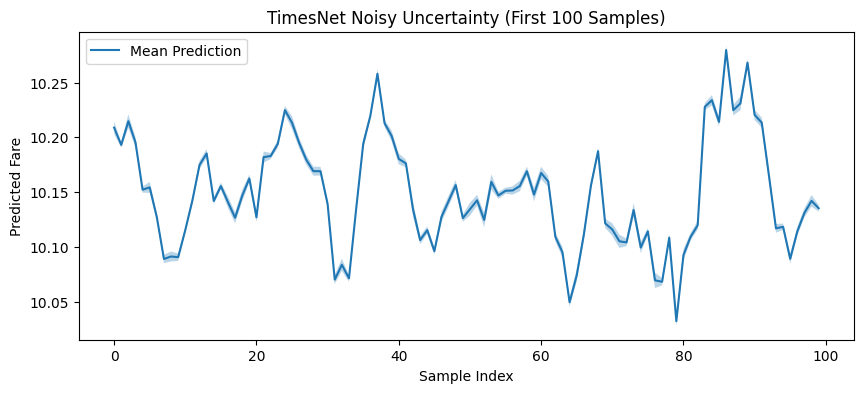


🔍 TimesNet Noisy OOD Evaluation Metrics:
 MAE: 1.7303
 MSE: 5.8836
 R2:  -0.0919


In [ ]:
# 1) Ensemble + uncertainty plot
ensemble_noisy = timesnet_ensemble(model_timesnet_noisy, test_loader_noisy, n=10, noise_level=0.1)
timesnet_uncertainty_plot(ensemble_noisy, title="TimesNet Noisy Uncertainty")

# 2) OOD test
y_true_ood_noisy, y_pred_ood_noisy = timesnet_ood_test(
    model_timesnet_noisy, test_loader_noisy, noise_level=0.1, label="TimesNet Noisy OOD"
)


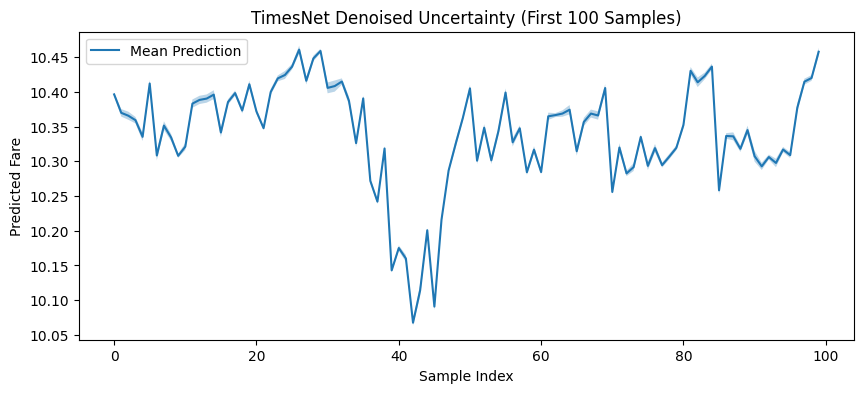


🔍 TimesNet Denoised OOD Evaluation Metrics:
 MAE: 1.3549
 MSE: 3.3534
 R2:  -0.0779


In [ ]:
# 1) Ensemble + uncertainty plot
ensemble_denoised = timesnet_ensemble(model_timesnet_denoised, test_loader_denoised, n=10, noise_level=0.1)
timesnet_uncertainty_plot(ensemble_denoised, title="TimesNet Denoised Uncertainty")

# 2) OOD test
y_true_ood_den, y_pred_ood_den = timesnet_ood_test(
    model_timesnet_denoised, test_loader_denoised, noise_level=0.1, label="TimesNet Denoised OOD"
)
